## <font color=red> Introduction
    
This case study aims to give us an idea of applying EDA in a real business scenario. In this assignment, we have to apply the techniques of EDA, and develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.


## <font color=red> Problem Statement
    
In this case study, we have to use EDA to understand how consumer attributes and loan attributes influence the tendency of default. We have to use EDA to analyse the patterns present in the data to ensure that the applicants capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

## <font color=red> Approach

For Exploratory Data Analysis, the steps followed are:
    
1. Importing necessary Libraries
2. Loading data
3. Data Inspection: Reading the data
4. Data Cleaning: It involves the following:
    - Dealing with Null values
    - Fixing Data Types and removing unecessary rows or columns
    - Dealing with Outliers
    - Binning the data into groups wherever required
5. Univariate Analysis: Analysis of single columns or variable using various Data Visualisation Techniques
6. Bivariate and Multivariate Analysis: Analysis of multiple columns or variables using various Data Visualisation Techniques to find relation between them if present
7. Conclusion: Detailing the Insights inferred.

***


## <font color=red> Import libraries
    
***

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# to display complete contents of a dataframe without any kind of truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

***

## <font color=red> Load Data
***

In [4]:
# application_data
app_df = pd.read_csv('application_data.csv')

In [5]:
# previous_application
prev_df = pd.read_csv('previous_application.csv')

In [6]:
# columns_description
# to avoid decode error, encoding='cp1252' parameter given for the function

describe_df = pd.read_csv('columns_description.csv', encoding='cp1252')

***

## <font color=red> Data Inspection
***

### `application_data`

In [7]:
# display the top 5 rows
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# total number of rows and columns 
app_df.shape

(307511, 122)

In [9]:
# check the information
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
# check the data types of each column
app_df.dtypes

SK_ID_CURR                      int64  
TARGET                          int64  
NAME_CONTRACT_TYPE              object 
CODE_GENDER                     object 
FLAG_OWN_CAR                    object 
FLAG_OWN_REALTY                 object 
CNT_CHILDREN                    int64  
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object 
NAME_INCOME_TYPE                object 
NAME_EDUCATION_TYPE             object 
NAME_FAMILY_STATUS              object 
NAME_HOUSING_TYPE               object 
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64  
DAYS_EMPLOYED                   int64  
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64  
OWN_CAR_AGE                     float64
FLAG_MOBIL                      int64  
FLAG_EMP_PHONE                  int64  
FLAG_WORK_PHONE                 int64  


In [11]:
# Statistical data for the numeric columns
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

> **Insights:**
- There are 122 columns and 307511 rows for the given data set
- Out of 122 columns, there are 'float64': 65, 'int64': 41 and 'object': 16
- The data types of most of the columns seem to be correct, we only need to convert negative values to positive in some columns and can also convert some columns to bool data type

### `previous_application`

In [12]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# total number of rows and columns of the DF
prev_df.shape

(1670214, 37)

In [14]:
# Information about data types for each column
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
# Statistical data for the numeric columns
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


> **Insights:** 
- There are 37 columns and 1670214 rows for the given data set.
- Out of 37 columns, there are 'float64': 15, 'int64': 6 and 'object': 16
- The data types of all columns seem to be correct, we only need to convert negative values to postitve values in some columns

### `description_columns`

In [16]:
describe_df

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


> **Insights:**
- This DataFrame can be split into 2 dfs, one for the current applications and another for the previous applications 
- Make 'Row' column as index and removing the columns 'Unamed: 0' and 'Table'
- This will make looking for the meaning of a column name easier 

- <font color=brown>Creating a DF of *description* for `application_data`

In [17]:
# description df for current applications
desc_app = describe_df[describe_df.Table == 'application_data'].copy()

# dropping the columns 'Unnamed: 0' and 'Table'
desc_app.drop(['Unnamed: 0','Table'], axis=1, inplace=True)

#setting 'Row' as index
desc_app.set_index('Row',inplace=True)

desc_app.head()

,Description,Special
Row,,
SK_ID_CURR,ID of loan in our sample,NaN
TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
CODE_GENDER,Gender of the client,NaN
FLAG_OWN_CAR,Flag if the client owns a car,NaN


- <font color=brown>Creating a DF of *description* for previous_application

In [18]:
# description df for previous applications
desc_prev = describe_df[describe_df.Table == 'previous_application.csv'].copy()

# dropping the columns 'Unnamed: 0' and 'Table'
desc_prev.drop(['Unnamed: 0','Table'], axis=1, inplace=True)

#setting 'Row' as index
desc_prev.set_index('Row',inplace=True)

desc_prev.head()

,Description,Special
Row,,
SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
SK_ID_CURR,ID of loan in our sample,hashed
NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
AMT_ANNUITY,Annuity of previous application,NaN
AMT_APPLICATION,For how much credit did client ask on the previous application,NaN


***

# <font color=indigo> Analysis for the `application_data`

## <font color=red> Data Cleaning
***

### <font color=BLue> Dealing with NULL values

- <font color=brown> **Checking the null value percentage**

In [19]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000 
TARGET                          0.000000 
NAME_CONTRACT_TYPE              0.000000 
CODE_GENDER                     0.000000 
FLAG_OWN_CAR                    0.000000 
FLAG_OWN_REALTY                 0.000000 
CNT_CHILDREN                    0.000000 
AMT_INCOME_TOTAL                0.000000 
AMT_CREDIT                      0.000000 
AMT_ANNUITY                     0.003902 
AMT_GOODS_PRICE                 0.090403 
NAME_TYPE_SUITE                 0.420148 
NAME_INCOME_TYPE                0.000000 
NAME_EDUCATION_TYPE             0.000000 
NAME_FAMILY_STATUS              0.000000 
NAME_HOUSING_TYPE               0.000000 
REGION_POPULATION_RELATIVE      0.000000 
DAYS_BIRTH                      0.000000 
DAYS_EMPLOYED                   0.000000 
DAYS_REGISTRATION               0.000000 
DAYS_ID_PUBLISH                 0.000000 
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                      0.000000 
FLAG_EMP_PHONE                  0.

> **Insights:**
- All the columns having null value percentage more than 45% can be removed
- Other columns having less than 45 % but more than 13% will be dealt with case by case

- <font color=brown> **Drop the columns having null value percentage > 45%**

In [20]:
# drop columns
app_df.drop(columns = app_df.loc[0:5,app_df.isnull().mean()*100 > 45].columns, inplace=True)

In [21]:
# checking the number of columns
app_df.shape

(307511, 73)

In [22]:
# checking null value percentage again
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000 
TARGET                         0.000000 
NAME_CONTRACT_TYPE             0.000000 
CODE_GENDER                    0.000000 
FLAG_OWN_CAR                   0.000000 
FLAG_OWN_REALTY                0.000000 
CNT_CHILDREN                   0.000000 
AMT_INCOME_TOTAL               0.000000 
AMT_CREDIT                     0.000000 
AMT_ANNUITY                    0.003902 
AMT_GOODS_PRICE                0.090403 
NAME_TYPE_SUITE                0.420148 
NAME_INCOME_TYPE               0.000000 
NAME_EDUCATION_TYPE            0.000000 
NAME_FAMILY_STATUS             0.000000 
NAME_HOUSING_TYPE              0.000000 
REGION_POPULATION_RELATIVE     0.000000 
DAYS_BIRTH                     0.000000 
DAYS_EMPLOYED                  0.000000 
DAYS_REGISTRATION              0.000000 
DAYS_ID_PUBLISH                0.000000 
FLAG_MOBIL                     0.000000 
FLAG_EMP_PHONE                 0.000000 
FLAG_WORK_PHONE                0.000000 
FLAG_CONT_MOBILE

- <font color=brown> **Drop the columns having null value percentage < 45% but have no use**                                                                  

In [23]:
#check the percentage of unique value counts
print(app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100)
print(app_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100)
print(app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100)

0.0    99.388703
1.0    0.586484 
2.0    0.021053 
3.0    0.003384 
4.0    0.000376 
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0.0    99.440209
1.0    0.485729 
2.0    0.039851 
3.0    0.016918 
4.0    0.009775 
5.0    0.003384 
6.0    0.003008 
9.0    0.000752 
8.0    0.000376 
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0.0    96.790881
1.0    3.085807 
2.0    0.074814 
3.0    0.021805 
4.0    0.012782 
6.0    0.007519 
5.0    0.003760 
8.0    0.001880 
7.0    0.000752 
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


> - For the columns 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', since 0 occurs more than 95% of time, we can drop the columns as it won't have any major impact on our analysis

In [24]:
# removing the columns
app_df.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'],inplace=True)

In [25]:
# checking percentage values for the FLAG_DOCUMENT columns
for c in range(2,22):
    s = f'FLAG_DOCUMENT_{c}'
    print(app_df[s].value_counts(normalize=True)*100)

0    99.995773
1    0.004227 
Name: FLAG_DOCUMENT_2, dtype: float64
1    71.002338
0    28.997662
Name: FLAG_DOCUMENT_3, dtype: float64
0    99.99187
1    0.00813 
Name: FLAG_DOCUMENT_4, dtype: float64
0    98.488509
1    1.511491 
Name: FLAG_DOCUMENT_5, dtype: float64
0    91.194461
1    8.805539 
Name: FLAG_DOCUMENT_6, dtype: float64
0    99.980814
1    0.019186 
Name: FLAG_DOCUMENT_7, dtype: float64
0    91.862405
1    8.137595 
Name: FLAG_DOCUMENT_8, dtype: float64
0    99.61042
1    0.38958 
Name: FLAG_DOCUMENT_9, dtype: float64
0    99.997724
1    0.002276 
Name: FLAG_DOCUMENT_10, dtype: float64
0    99.608794
1    0.391206 
Name: FLAG_DOCUMENT_11, dtype: float64
0    99.99935
1    0.00065 
Name: FLAG_DOCUMENT_12, dtype: float64
0    99.647492
1    0.352508 
Name: FLAG_DOCUMENT_13, dtype: float64
0    99.706352
1    0.293648 
Name: FLAG_DOCUMENT_14, dtype: float64
0    99.879029
1    0.120971 
Name: FLAG_DOCUMENT_15, dtype: float64
0    99.00719
1    0.99281 
Name: FLAG_DOCUMENT_

> - Here, since 0 occurs more than 95% of time (except for FLAG_DOCUMENT_3), we can drop the columns as it won't have any major impact on our analysis

In [26]:
# removing columns

app_df.drop(columns=[f'FLAG_DOCUMENT_{c}' for c in range(2,22) if c!=3], inplace=True)

In [27]:
# checking the shape to check if columns removed
app_df.shape

(307511, 51)

<font color=brown>**Columns we will analyze now for missing values:**
1. OCCUPATION_TYPE
2. CODE_GENDER
3. AMT_REQ_CREDIT_BUREAU_MON
4. AMT_REQ_CREDIT_BUREAU_QRT
5. AMT_REQ_CREDIT_BUREAU_YEAR

**<font color=green> OCCUPATION_TYPE**

In [28]:
#check the unique value counts
app_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants              9813 
Medicine staff           8537 
Security staff           6721 
Cooking staff            5946 
Cleaning staff           4653 
Private service staff    2652 
Low-skill Laborers       2093 
Waiters/barmen staff     1348 
Secretaries              1305 
Realty agents            751  
HR staff                 563  
IT staff                 526  
Name: OCCUPATION_TYPE, dtype: int64

> - For this column we can replace null values with 'Unknown' as it is a categorical data type

- <font color=brown>Replace NaN with 'Unknown'

In [29]:
# replace null with 'Unknown'
app_df.OCCUPATION_TYPE.fillna('Unknown', inplace=True)

In [30]:
# check to see if all null values replaced
app_df.OCCUPATION_TYPE.isnull().sum()

0

<font color=green> **CODE_GENDER**

In [31]:
# check the unique values 
app_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA    4     
Name: CODE_GENDER, dtype: int64

> - There is 'XNA' value present in the column. Only 4 values are there, so these can be replaced with 'F', which is the mode, as it won't make a big impact  

- <font color=brown> Replacing XNA with F

In [32]:
#replace XNA with F
app_df['CODE_GENDER'].replace('XNA','F',inplace=True)

In [33]:
# check the value counts again
app_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

**<font color=green> AMT_REQ_CREDIT_BUREAU_MON**

In [34]:
#check the percentage of unique value counts
app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
23.0    0.000004
27.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [35]:
# calculating mean and median
print(app_df['AMT_REQ_CREDIT_BUREAU_MON'].mean())
print(app_df['AMT_REQ_CREDIT_BUREAU_MON'].median())

0.26739526000781977
0.0


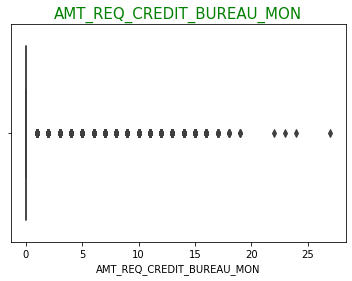

In [36]:
# plot the boxplot to see value distribution
sns.boxplot(app_df['AMT_REQ_CREDIT_BUREAU_MON'])
plt.title('AMT_REQ_CREDIT_BUREAU_MON',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

> **Insights:**
- As can be seen from the percentage distribution of values and the boxplot, most of the values are 0 and there are outliers present
- Thus, we can replace null values with median

**<font color=green> AMT_REQ_CREDIT_BUREAU_QRT**

In [37]:
#check the percentage of unique value counts
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
8.0      0.000026
7.0      0.000026
261.0    0.000004
19.0     0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [38]:
# calculating mean and median
print(app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mean())
print(app_df['AMT_REQ_CREDIT_BUREAU_QRT'].median())

0.26547414959848414
0.0


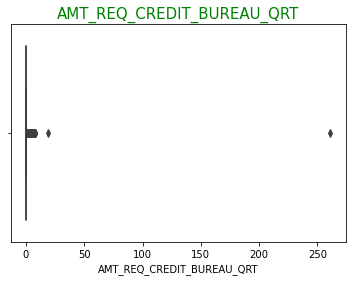

In [39]:
# plot the boxplot to see value distribution
sns.boxplot(app_df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.title('AMT_REQ_CREDIT_BUREAU_QRT',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

> **Insights:**
- As can be seen from the percentage distribution of values and the boxplot, most of the values are 0 and there are outliers present
- Thus, we can replace null values with median

**<font color=green> AMT_REQ_CREDIT_BUREAU_YEAR**

In [40]:
#check the percentage of unique value counts
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)

0.0     0.269937
1.0     0.238372
2.0     0.188697
3.0     0.126425
4.0     0.077875
5.0     0.045310
6.0     0.026193
7.0     0.014546
8.0     0.007996
9.0     0.004120
11.0    0.000117
12.0    0.000113
10.0    0.000083
13.0    0.000071
14.0    0.000038
17.0    0.000026
15.0    0.000023
19.0    0.000015
18.0    0.000015
16.0    0.000011
25.0    0.000004
23.0    0.000004
22.0    0.000004
21.0    0.000004
20.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

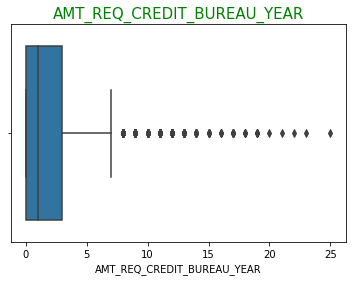

In [41]:
# plot the boxplot to see value distribution
sns.boxplot(app_df['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

In [42]:
print(app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())
print(app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

1.899974435321363
1.0


> **Insights:**
- As can be seen from the percentage distribution of values and the boxplot, there are outliers present
- Thus, we can replace null values with median

***

### <font color=BLue> Fixing the Data Types
   

<font color=green>**DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH**

In [43]:
# check the values of the columns
app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [44]:
# checking data types
app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].dtypes

DAYS_BIRTH                int64  
DAYS_EMPLOYED             int64  
DAYS_REGISTRATION         float64
DAYS_ID_PUBLISH           int64  
DAYS_LAST_PHONE_CHANGE    float64
dtype: object

> **Insights:**
- As can be seen above, the following values in the columns are negative
- They are of int or float, but we may have to convert negative values to positive values

- <font color=brown> **Converting negative to positive**

In [45]:
# converting negative values to positive
app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = abs(app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']])

<font color=green> **FLAG_DOCUMENT_3**

In [46]:
# checking the description for the variable
desc_app.loc['FLAG_DOCUMENT_3']

Description    Did client provide document 3
Special        NaN                          
Name: FLAG_DOCUMENT_3, dtype: object

In [47]:
# checking the value counts for the variable
app_df['FLAG_DOCUMENT_3'].value_counts()

1    218340
0    89171 
Name: FLAG_DOCUMENT_3, dtype: int64

> **Insights:**
- This column shows whether the document submitted or not where 0: not submitted ,and  1: submitted
- We can convert the follwing column into bool type

- <font color=brown> **Converting data type to bool**

In [48]:
# converting int data type to bool for 'FLAG_DOCUMENT_3'
app_df['FLAG_DOCUMENT_3'] = app_df['FLAG_DOCUMENT_3'].astype('bool')

In [49]:
#checking the value counts again
app_df['FLAG_DOCUMENT_3'].value_counts()

True     218340
False    89171 
Name: FLAG_DOCUMENT_3, dtype: int64

***

### <font color=BLue> Dealing with OUTLIERS
    

<font color=brown>**Columns we will analyze now for outliers:**
1. AMT_REQ_CREDIT_BUREAU_QRT
2. AMT_INCOME_TOTAL
3. AMT_CREDIT
4. DAYS_EMPLOYED

<font color=green> **AMT_REQ_CREDIT_BUREAU_QRT**

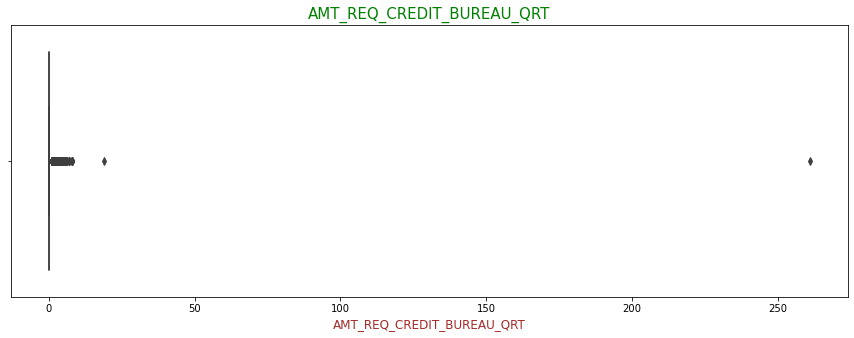

In [50]:
# set the figure size
plt.figure(figsize=(15,5))

# plot a boxplot
sns.boxplot(app_df['AMT_REQ_CREDIT_BUREAU_QRT'])

# xlabel
plt.xlabel('AMT_REQ_CREDIT_BUREAU_QRT', fontdict={'fontsize':12, 'fontweight':5, 'color':'Brown'})

plt.title('AMT_REQ_CREDIT_BUREAU_QRT',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

In [52]:
# description of the variable
desc_app.loc['AMT_REQ_CREDIT_BUREAU_QRT']

Description    Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
Special        NaN                                                                                                                      
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: object

> **Insights:**
- As can be seen from the box plot, we have on outlier which is much greater than the rest of the values.
- Looking at the description of the variable, this data seems to be a 'wrong data'.
- We can replace this outlier with the median

- <font color=brown> Replace with median

In [53]:
# replace the outlier value with median
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].replace(app_df['AMT_REQ_CREDIT_BUREAU_QRT'].max(), app_df['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace=True)

In [54]:
# check the statitical description again
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean     0.264493     
std      0.612325     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      19.000000    
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<font color=green> **AMT_INCOME_TOTAL, AMT_CREDIT**

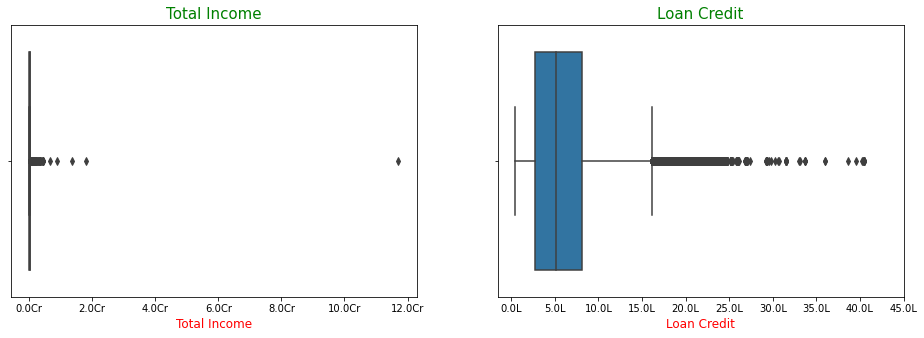

In [55]:
# set the figure size
plt.figure(figsize=(16,5))

# plot boxplot for AMT_INCOME_TOTAL
plt.subplot(1,2,1)
sns.boxplot(app_df['AMT_INCOME_TOTAL'])
# Modifying the ticks to show information in crores
ticks = np.arange(0,140000000,20000000)
labels = [f'{x/10000000}Cr' for x in ticks]
plt.xticks(ticks,labels)
# xlabel
plt.xlabel('Total Income', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})
# title
plt.title('Total Income',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})


# plot boxplot for AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(app_df['AMT_CREDIT'])
# Modifying the ticks to show information in lakhs
ticks = np.arange(0,5000000,500000)
labels = [f'{x/100000}L' for x in ticks]
plt.xticks(ticks,labels)
# xlabel
plt.xlabel('Loan Credit', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})
# title
plt.title('Loan Credit',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

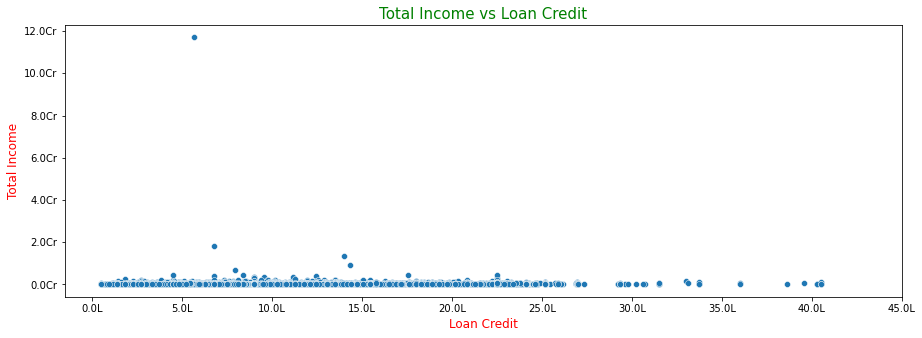

In [56]:
# set the figure size
plt.figure(figsize=(15,5))

# plot scatterplot to check the outliers
sns.scatterplot(x=app_df['AMT_CREDIT'], y=app_df['AMT_INCOME_TOTAL'])

# Modifying the ticks to show information in crores
ticks = np.arange(0,140000000,20000000)
labels = [f'{x/10000000}Cr' for x in ticks]
plt.yticks(ticks,labels)

# Modifying the ticks to show information in lakhs
ticks = np.arange(0,5000000,500000)
labels = [f'{x/100000}L' for x in ticks]
plt.xticks(ticks,labels)

#labels
plt.ylabel('Total Income', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})
plt.xlabel('Loan Credit', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})

#title
plt.title('Total Income vs Loan Credit', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

In [57]:
#checking the occupation type of person having highest income
app_df['OCCUPATION_TYPE'][app_df['AMT_INCOME_TOTAL']==app_df['AMT_INCOME_TOTAL'].max()]

12840    Laborers
Name: OCCUPATION_TYPE, dtype: object

> **Insights:**
- As can be seen from the boxplot, there is an outlier in 'AMT_INCOME_TOTAL' whose value is much more than compared to others. As evident from scatterplot (huge difference between Income and Loan value) and person's occupation, this data may be an incorrect data. We can replcae this value with the median. Oher outliers can be ignored while dealing with this variable.
- There are few outliers in 'AMT_CREDIT'. Use median instead of mean while dealing with this variable.
 

- <font color=brown> Replacing with mean

In [58]:
# replacing OUTLIER in 'AMT_INCOME_TOTAL' with the mean value for 'laborers' calculated by ignoring the outlier
outlier_val = app_df['AMT_INCOME_TOTAL'].max()
mean_val = app_df['AMT_INCOME_TOTAL'][(app_df['OCCUPATION_TYPE']=='Laborers') & (app_df['AMT_INCOME_TOTAL']!=outlier_val)].mean()

app_df['AMT_INCOME_TOTAL'] = app_df['AMT_INCOME_TOTAL'].replace(outlier_val, mean_val)

In [59]:
# check the statistical data
app_df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.684180e+05
std      1.088116e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

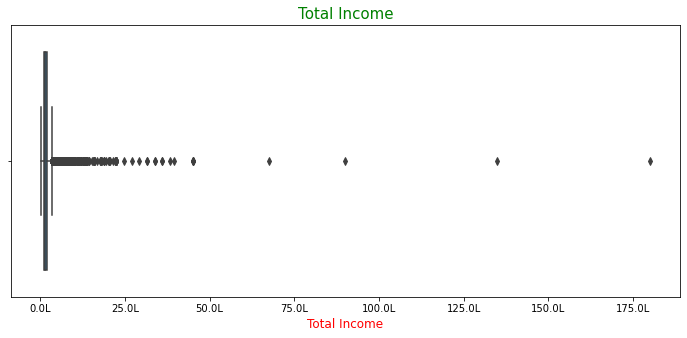

In [60]:
# check the new boxplot for 'AMT_INCOME_TOTAL'

plt.figure(figsize=(12,5))

sns.boxplot(app_df['AMT_INCOME_TOTAL'])

# Modifying the ticks to show information in Lakhs
ticks = np.arange(0,18000000,2500000)
labels = [f'{x/100000}L' for x in ticks]
plt.xticks(ticks,labels)

# xlabel
plt.xlabel('Total Income', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})

# title
plt.title('Total Income',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

<font color=green> **DAYS_EMPLOYED**

In [61]:
# check the statistical description 
app_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean     67724.742149 
std      139443.751806
min      0.000000     
25%      933.000000   
50%      2219.000000  
75%      5707.000000  
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

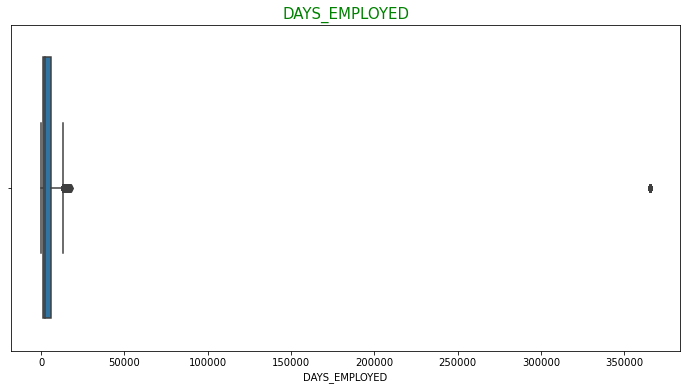

In [62]:
# plot a boxplot of DAYS_EMPLOYED

plt.figure(figsize=(12,6))

sns.boxplot(app_df['DAYS_EMPLOYED'])

plt.title('DAYS_EMPLOYED',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

In [63]:
# percentage of values having DAYS_EMPLOYED equal to the outlier value
app_df['DAYS_EMPLOYED'][app_df['DAYS_EMPLOYED']==365243].count()/len(app_df)*100

18.00716071945394

> - It can be seen here that OUTLIER value is too high and it is clearly an incorrect data as when converted to years, it amounts to 1000 years. Also, 18% of data have this value. We can replace this value with NaN

- <font color=brown> Replace with NaN 

In [64]:
# replacing the outlier value with NaN in 'DAYS_EMPLOYED'
app_df['DAYS_EMPLOYED'].replace(app_df['DAYS_EMPLOYED'].max(), np.NaN, inplace=True)

***

### <font color=BLue> Binning


<font color=green> **Binning Age in different categories**

In [65]:
# create a new column to show age in years
app_df['AGE_IN_YEARS'] = app_df['DAYS_BIRTH']/365

In [66]:
app_df['AGE_IN_YEARS'].describe()

count    307511.000000
mean     43.936973    
std      11.956133    
min      20.517808    
25%      34.008219    
50%      43.150685    
75%      53.923288    
max      69.120548    
Name: AGE_IN_YEARS, dtype: float64

In [67]:
# create a new column to put age in different categories
app_df['AGE_GROUP'] = pd.cut(app_df['AGE_IN_YEARS'], bins=[20,30,40,50,60,100], labels=['20-30','30-40','40-50','50-60','60+'])

In [68]:
# percentage count of people belonging to different age category
app_df['AGE_GROUP'].value_counts(normalize=True)*100

30-40    26.765872
40-50    24.890492
50-60    22.133192
20-30    14.640452
60+      11.569993
Name: AGE_GROUP, dtype: float64

<font color=green> **Binning Income in different categories**

In [69]:
# create a new column to bin income into different categories according to quantiles
app_df['INCOME_GROUP'] = pd.qcut(app_df['AMT_INCOME_TOTAL'], [0,0.2,0.4,0.6,0.8,1], ['Very Low','Low','Medium','High','Very High'])

In [70]:
# check the percentage counts for each category
app_df['INCOME_GROUP'].value_counts(normalize=True)*100

Low          27.887132
High         24.556520
Very Low     20.705276
Very High    15.322054
Medium       11.529018
Name: INCOME_GROUP, dtype: float64

<font color=green> **Binning Loan in different categories**

In [71]:
# create a new column to bin loan amount into different categories according to quantiles
app_df['CREDIT_GROUP'] = pd.qcut(app_df['AMT_CREDIT'], [0,0.2,0.4,0.6,0.8,1], ['Very Low','Low','Medium','High','Very High'])

In [72]:
# check the percentage counts for each category
app_df['CREDIT_GROUP'].value_counts(normalize=True)*100

Very Low     21.113066
High         20.820068
Medium       20.016195
Very High    19.157689
Low          18.892983
Name: CREDIT_GROUP, dtype: float64

***

## <font color=red> Univariate Analysis

In [73]:
# Target variable
app_df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1    8.072882 
Name: TARGET, dtype: float64

> - This is our TARGET variable where 1: defaulters and 0: non-defaulters. 

8.072881945686495
91.92711805431351


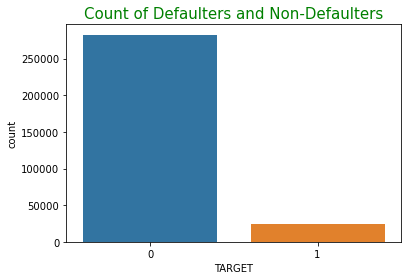

In [74]:
# checking percentage of Deafulters and Non-defaulters and plotting a bargraph
print(app_df['TARGET'][app_df['TARGET']==1].count()/len(app_df)*100)
print(app_df['TARGET'][app_df['TARGET']==0].count()/len(app_df)*100)

sns.countplot(app_df['TARGET'])

plt.title('Count of Defaulters and Non-Defaulters',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

> - Majority (91%) of people lie in Non-Defaulters category. We now divide the data set into two parts: Defaulters and Non-defaulters

<font color=brown> **Data set of Defaulters**

In [75]:
# Data set of defaulters
df_1 = app_df[app_df['TARGET']==1].copy()

<font color=brown> **Data set of Non-Defaulters**

In [76]:
# Data set on Non-defaulters
df_0 = app_df[app_df['TARGET']==0].copy()

> - Now we do analysis of different variables for Defaulters and Non-defaulters

<font color=green> **For Categorical variables:**

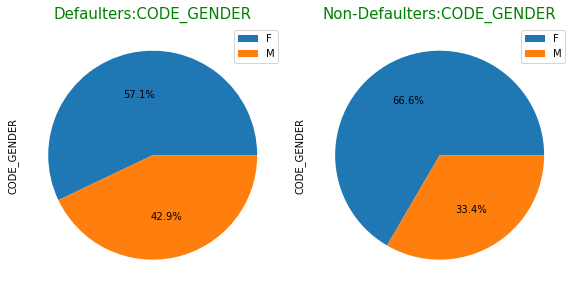

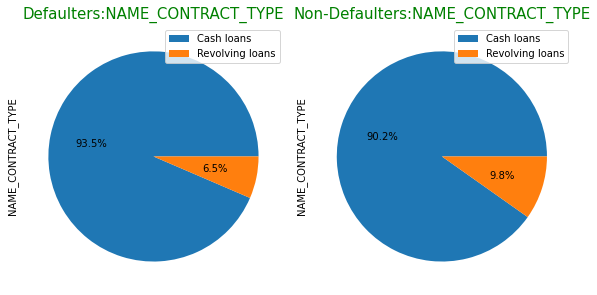

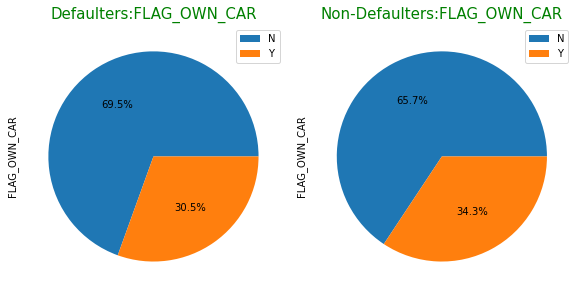

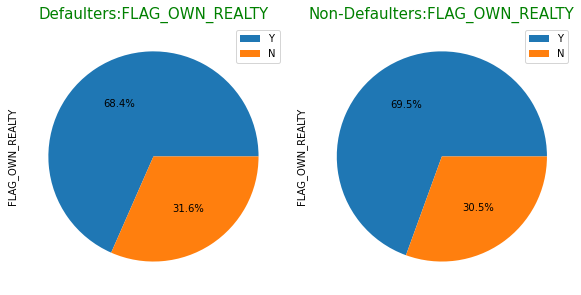

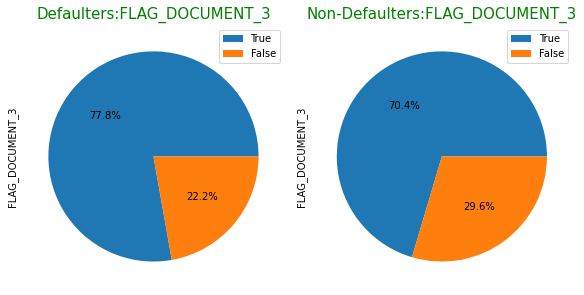

In [77]:
# variables to be analysed
# 'CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_DOCUMENT_3'

cols = ['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_DOCUMENT_3'] 

for i,v in enumerate(cols):
    plt.figure(figsize=(40,30))
    
    # for TARGET=1 (Defaulters)
    plt.subplot(len(cols),len(cols)*2,i+1) 
    df_1[v].value_counts().plot.pie(autopct='%1.1f%%', labeldistance=None)
    plt.title(f'Defaulters:{v}', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.legend(loc='upper right')
    
    # for TARGET=0 (Non-Defaulters)
    plt.subplot(len(cols),len(cols)*2,i+2)
    df_0[v].value_counts().plot.pie(autopct='%1.1f%%', labeldistance=None)
    plt.title(f'Non-Defaulters:{v}', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

> **Insights:**
- More females have applied for loans. Female percentage in Non-Defaulters is more than that in Defaulters. Thus we can make a conclusion here that Females are less likely to default than Males
- Most people have applied for Cash Loans
- People who don't own a Car have applied for more loans
- People who own a flat or a house have applied for more loans
- People who have submitted Document 3 are shown to be more likely to Default


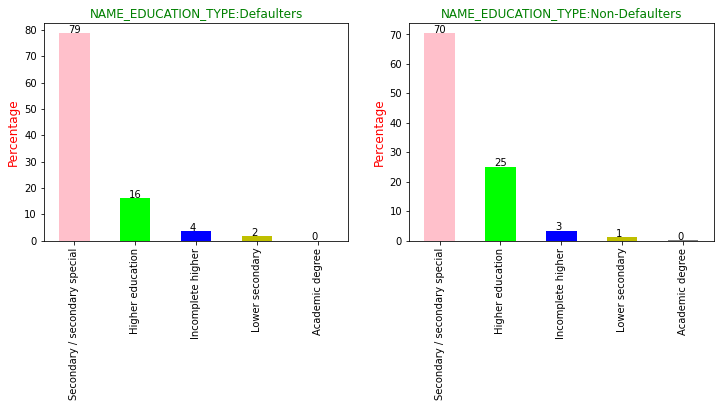

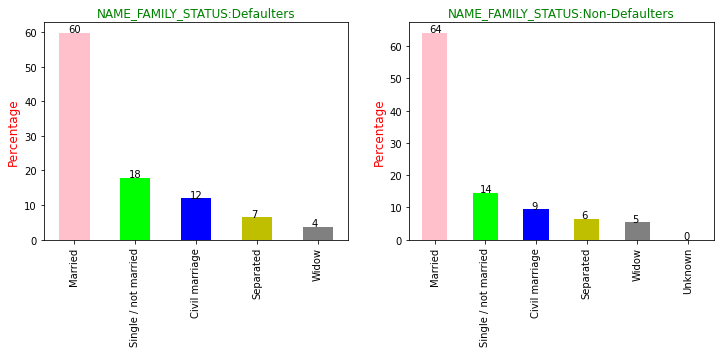

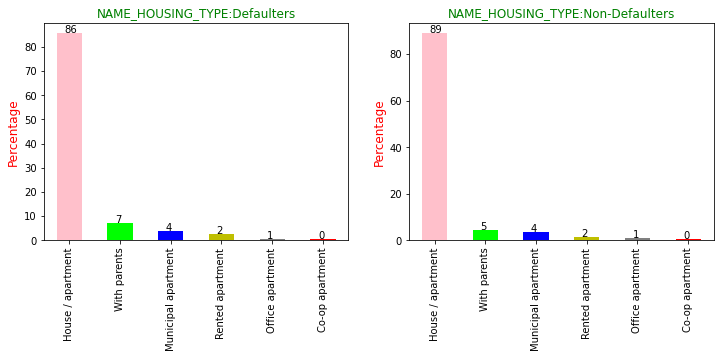

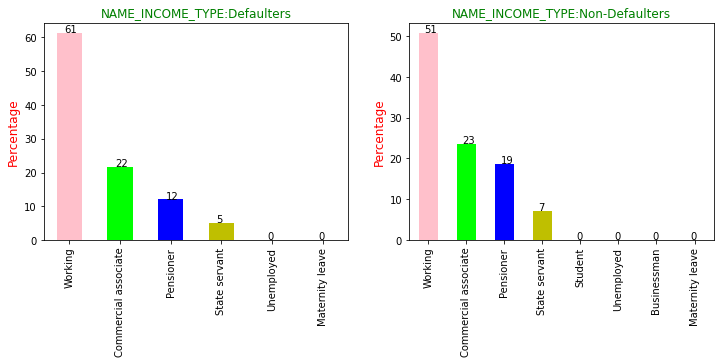

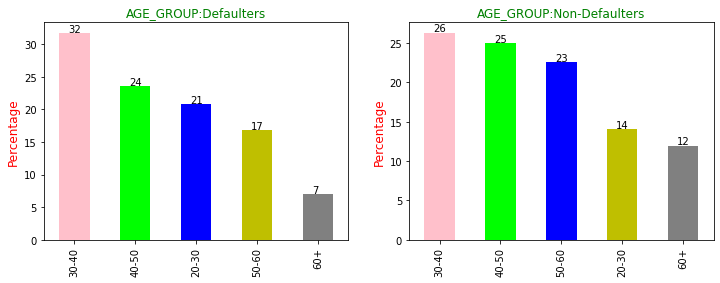

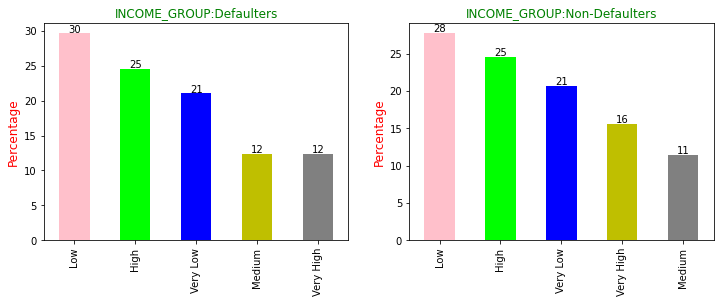

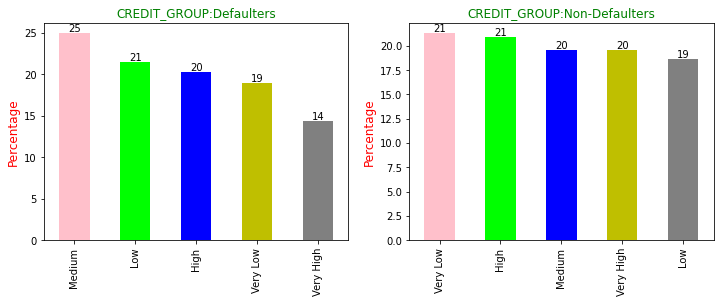

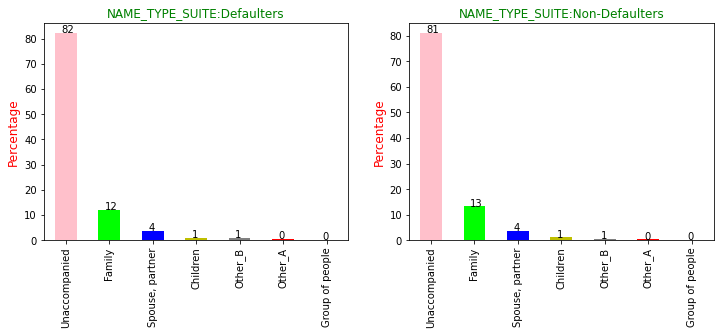

In [78]:
# variables to be analysed
# 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
# 'NAME_INCOME_TYPE','AGE_GROUP','INCOME_GROUP', 'CREDIT_GROUP','NAME_TYPE_SUITE'

cols = ['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'NAME_INCOME_TYPE','AGE_GROUP','INCOME_GROUP', 'CREDIT_GROUP','NAME_TYPE_SUITE']

for i,v in enumerate(cols):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    ax = (df_1[v].value_counts(normalize=True)*100).plot.bar(color=['pink','lime','b','y','grey','r','g'])
    plt.ylabel('Percentage', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})
    plt.title(f'{v}:Defaulters', fontdict={'fontsize':12, 'fontweight':5, 'color':'g'})
    for p in ax.patches:
        ax.annotate(round(p.get_height()), xy=(p.get_x()+0.15, p.get_height()+0.15))

    # for TARGET=0 (Non-Defaulters)
    plt.subplot(1,2,2)
    ax = (df_0[v].value_counts(normalize=True)*100).plot.bar(color=['pink','lime','b','y','grey','r','g'])
    plt.ylabel('Percentage', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})
    plt.title(f'{v}:Non-Defaulters', fontdict={'fontsize':12, 'fontweight':5, 'color':'g'})
    for p in ax.patches:
        ax.annotate(round(p.get_height()), xy=(p.get_x()+0.15, p.get_height()+0.15))

    plt.show()

> **Insights:**
- As seen, people with *'Higher Education'* have a higher percentage in Non-Defaulters' case as compared to their percentage in Defaulters' case. Thus we infer that such people are less likely to Default on loan. Also, people with 'Academic Degree' are less likely to default but their numbers is very less, hence not much profitable. People with 'Secondary' and 'Incomplete Higher' are more likely to Default
- Married people tend to take more loans. Single and Civil marriage people are more likely to Default.
- People who have their own House/apartment tend to take more loans. People living with parents are more likely to Default.
- Working aplied for most number of loans and more likely to Default, but Pensioners have least chance of Defaulting.
- People in 20-30 and 30-40 age group are more likely to default than those in 60+
- People with very high income are least likely to default
- People who have applied for loans in medium range are more likely to default

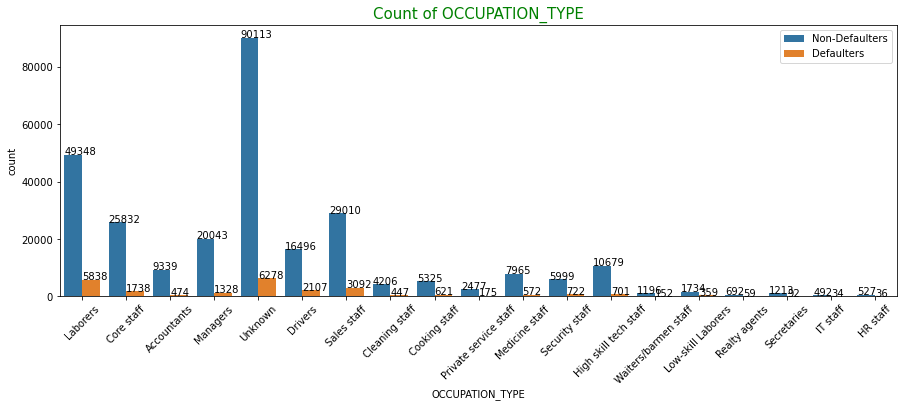

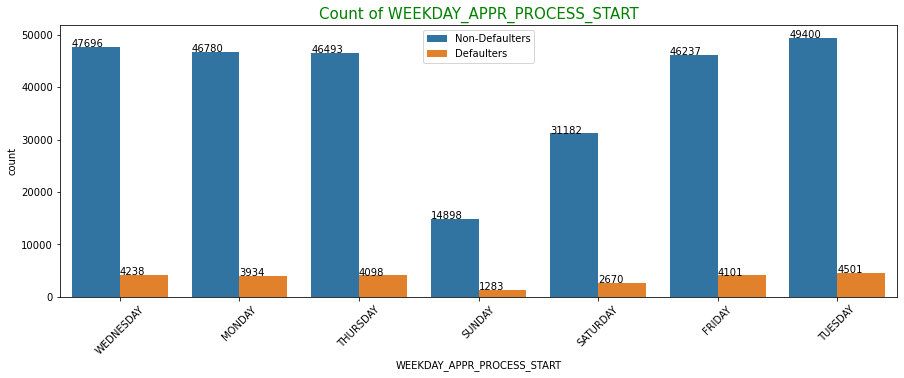

In [79]:
# variables to be analysed
# 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'

cols = ['OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']

for i,v in enumerate(cols):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=app_df, x=v, hue='TARGET')
    plt.xticks(rotation=45)
    # show frequency of bars
    for p in ax.patches:
        ax.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))
    plt.legend(['Non-Defaulters','Defaulters'])
    plt.title(f'Count of {v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()


> **Insights:**
- Laborers tend to take more loans and are more likely to Default compared to other Occupation Types. IT Staff have taken least number of loans.
- People prefer mostly to apply for loans on Tuesday and least on Sunday. There can be some underlying reason for it that Sunday is mostly holiday for the Financial Institutions

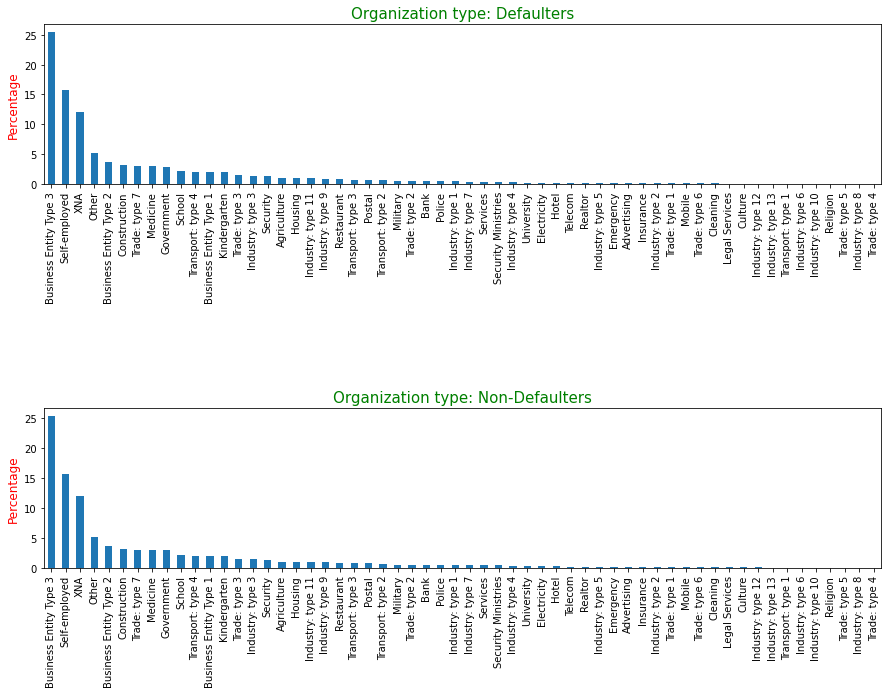

In [80]:
# variable to be analysed: 'ORGANIZATION_TYPE'

plt.figure(figsize=(15,10))

# for TARGET=1 (Defaulters)
plt.subplot(3,1,1)
(df_1['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.title('Organization type: Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.ylabel('Percentage', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})

# for TARGET=0 (Non-Defaulters)
plt.subplot(3,1,3)
(df_1['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.title('Organization type: Non-Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.ylabel('Percentage', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})

plt.show()

> - Business Entity Type 3 have apllied for the most number of loansnew

<font color=green> **For the Numerical variables:**

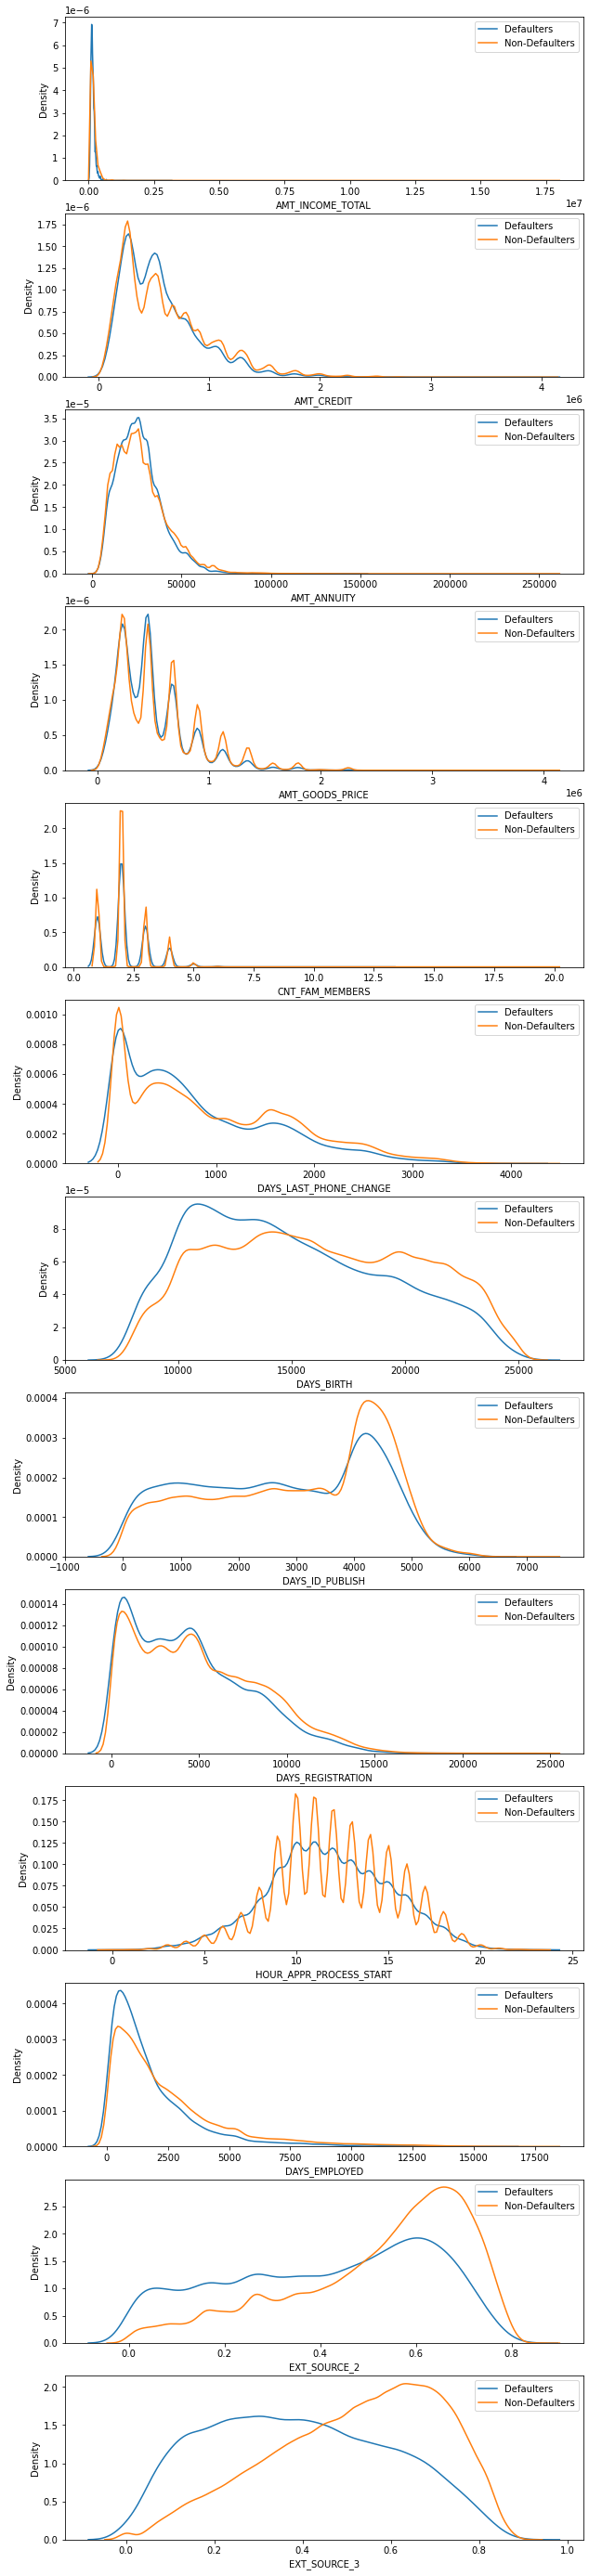

In [128]:
# variables to be analysed
# 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
# 'DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
# 'HOUR_APPR_PROCESS_START','DAYS_EMPLOYED','EXT_SOURCE_2','EXT_SOURCE_3'

cols=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
      'DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
      'HOUR_APPR_PROCESS_START','DAYS_EMPLOYED','EXT_SOURCE_2','EXT_SOURCE_3']

plt.figure(figsize=(10,50))

for i,v in (enumerate(cols)):
    plt.subplot(len(cols),1,i+1)
    sns.distplot(df_1[v].dropna(),hist=False,label='Defaulters')
    sns.distplot(df_0[v].dropna(),hist=False,label='Non-Defaulters')
    plt.legend()    


plt.show()    


> **Insights:**
- People with low income are more likely to default
- People who have applied for loans in medium range are more likely to default 
- People with high family members have applied for less loans
- People who changed their phone numbers recently are more likely to default
- People in the middle age are more likely to default
- People who changed their ID and registration recently are more likely to default
- People have applied more for the loans in the hours of 9 to 15
- People with low amount of Annuity have taken more loans
- People who are new in their jobs are more likely to apply for loans and also more likely to default
- Higher Defaulter rate for lower values of EXT_SOURCE_2 and EXT_SOURCE_3

***

## <font color=red> Bivariate and Multivariate Analysis


<font color=green>**Gender vs other Categorical Variables**

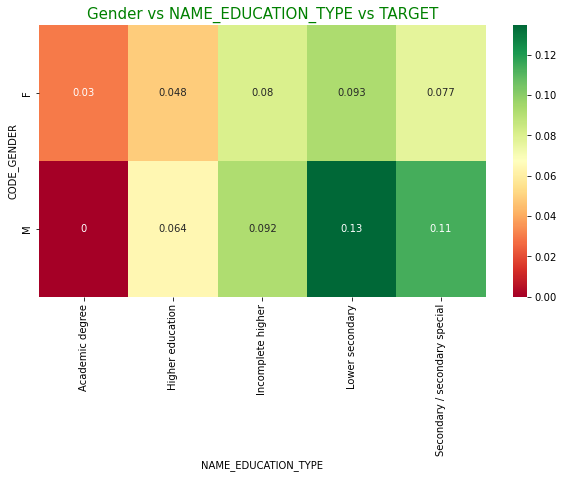

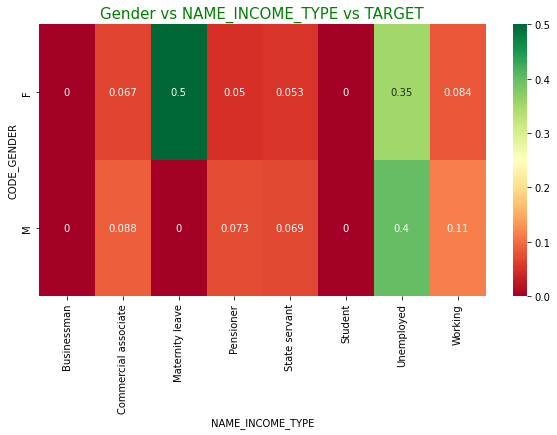

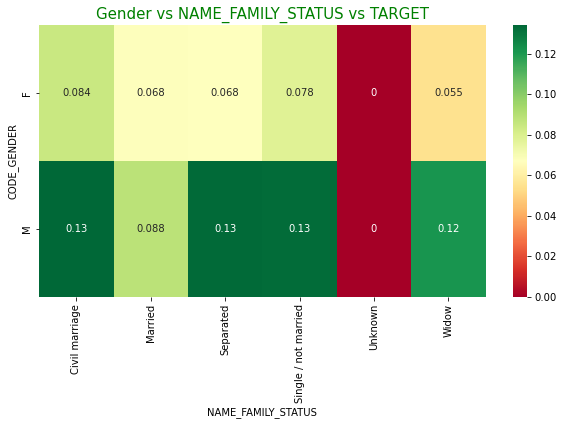

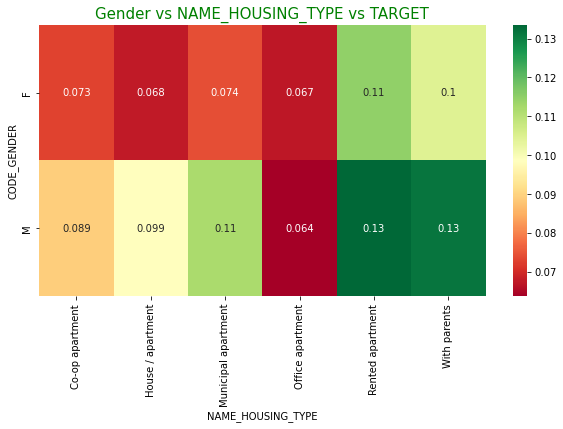

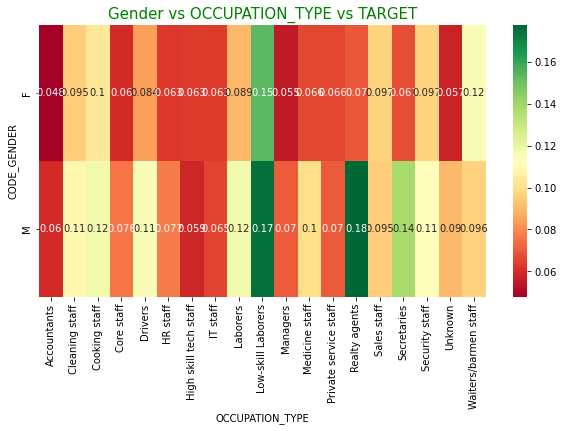

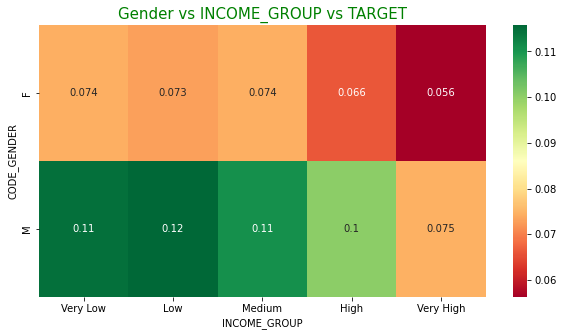

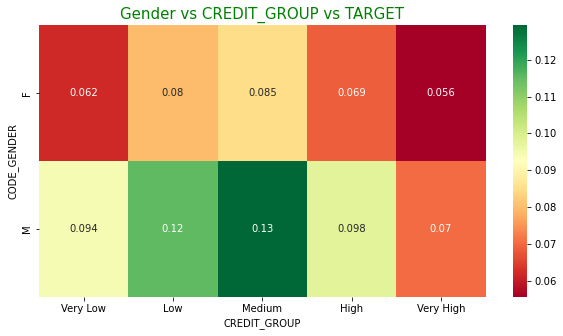

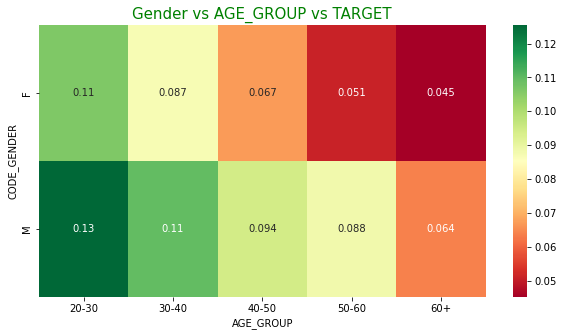

In [131]:
# variables to be analysed
# 'NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
# 'INCOME_GROUP', 'CREDIT_GROUP','AGE_GROUP'

cols = ['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
       'INCOME_GROUP', 'CREDIT_GROUP','AGE_GROUP']

# plot a heatmap of Gender vs some categorical variable with TARGET as mean
# Higher value means more likely to default
for i,v in enumerate(cols):
    plt.figure(figsize=(10,5))
    sns.heatmap(app_df.pivot_table(index='CODE_GENDER',columns=v, values='TARGET', aggfunc='mean'), annot=True, cmap="RdYlGn")
    plt.title(f'Gender vs {v} vs TARGET', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

> Following people have a higher chance of Defaulting:
- Males with 
    - Lower Secondary and Scondary education 
    - Civil Married, Seperated, Single or Widowed
    - Living with Parents or Rented Apartments
    - Low-skilled Laborers or Realty Agents
    - 20-30 followed by 30-40 age group
    - Low and Medium Credit
    - Very Low, Low and Medium Income
- Females with
    - On Maternity Leave
    - Low-skilled Laborers
    - 20-30 age group

<font color=green>**Gender vs Numerical Variables**

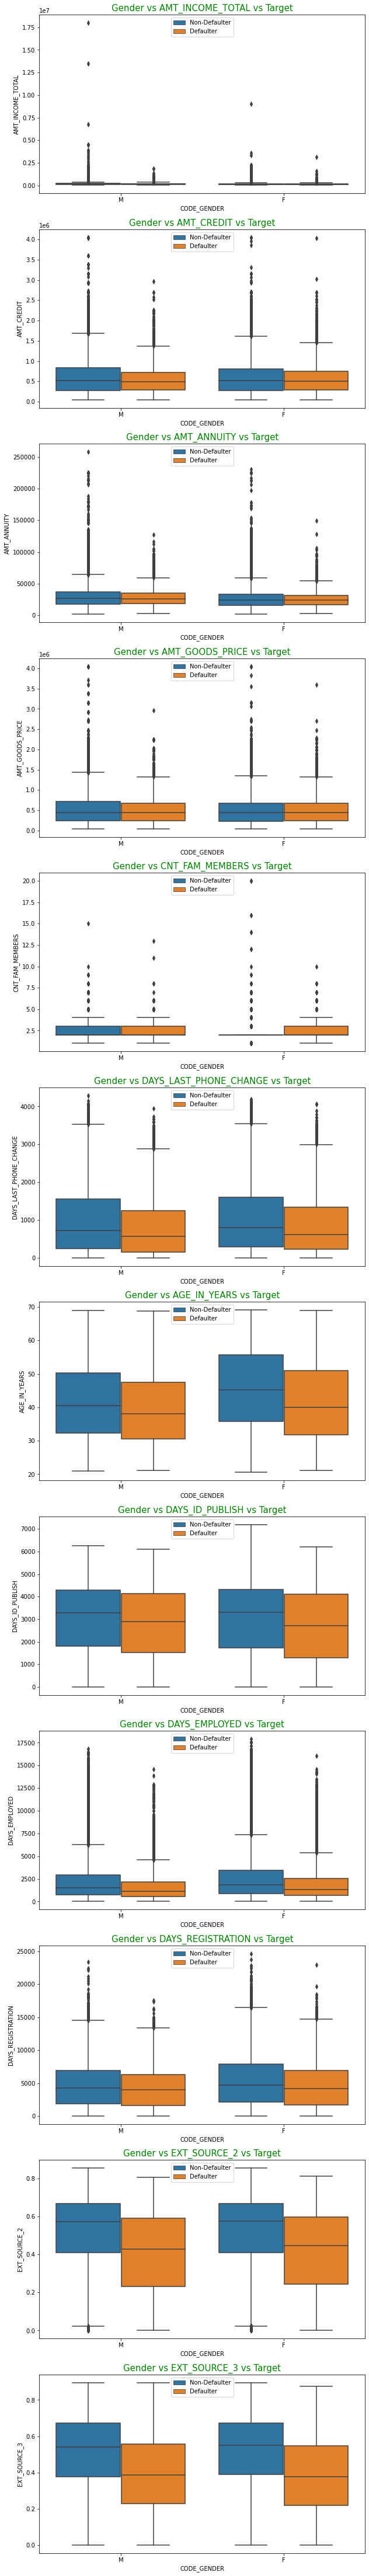

In [129]:
# variables to be analysed
# 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
# 'DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION',
# 'EXT_SOURCE_2','EXT_SOURCE_3'

cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
      'DAYS_LAST_PHONE_CHANGE','AGE_IN_YEARS','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION',
       'EXT_SOURCE_2','EXT_SOURCE_3']

# plot a boxplot of Gender vs a Numerical variable
# for both TARGET=0 (Non-Defaulters) and TARGET=1 (Defaulters)
plt.figure(figsize=(10,80))

for i,v in enumerate(cols):
    plt.subplot(len(cols),1,i+1)
    sns.boxplot(data=app_df, x='CODE_GENDER',y=v, hue='TARGET')
    
    #setting legend
    l = plt.legend(loc='upper center')
    l.get_texts()[0].set_text('Non-Defaulter')
    l.get_texts()[1].set_text('Defaulter')
    
    #title
    plt.title(f'Gender vs {v} vs Target',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
      
plt.show()

> **Insights:**
- Females having family count of less than 2.5 are least likely to Default
- Males and Females who have changed phone number recently are likely to Default
- Younger males and females are more likely to default than older ones
- Newly employed are more likely to default than experienced ones
- People with less score of EXT_SOURCE_2 and EXT_SOURCE_3 are more likely to default 

**<font color=green> Income vs Credit amount vs TARGET**

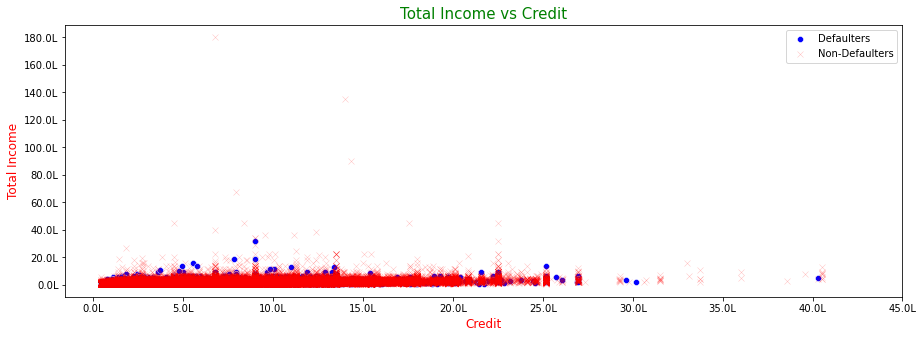

In [84]:
# set the figure size
plt.figure(figsize=(15,5))

# plot scatterplot to check the outliers
sns.scatterplot(x=df_1['AMT_CREDIT'], y=app_df['AMT_INCOME_TOTAL'],color='b', label='Defaulters', sizes=20)
sns.scatterplot(x=df_0['AMT_CREDIT'], y=app_df['AMT_INCOME_TOTAL'],color='r', label='Non-Defaulters', alpha=0.25, marker='x')

# Modifying the ticks to show information in lakhs
ticks = np.arange(0,20000000,2000000)
labels = [f'{x/100000}L' for x in ticks]
plt.yticks(ticks,labels)

# Modifying the ticks to show information in lakhs
ticks = np.arange(0,5000000,500000)
labels = [f'{x/100000}L' for x in ticks]
plt.xticks(ticks,labels)

#labels
plt.ylabel('Total Income', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})
plt.xlabel('Credit', fontdict={'fontsize':12, 'fontweight':5, 'color':'r'})

#title
plt.title('Total Income vs Credit', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.legend()

plt.show()

<font color=green> **Income vs Age vs Credit**

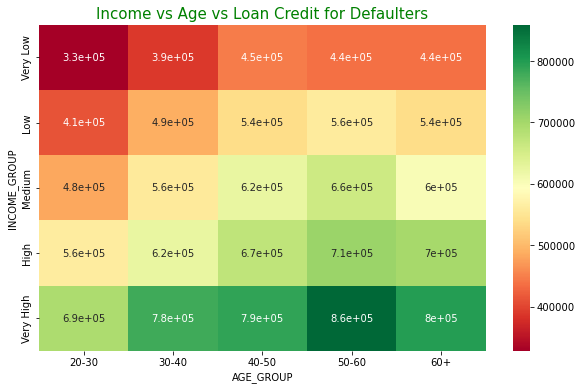

In [136]:
# heatmap for TARGET=1 (Defaulters)
plt.figure(figsize=(10,6))
pvt_tbl = df_1.pivot_table(index='INCOME_GROUP', columns='AGE_GROUP', values='AMT_CREDIT', aggfunc='mean')
sns.heatmap(pvt_tbl, annot=True, cmap='RdYlGn')
plt.title('Income vs Age vs Loan Credit for Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

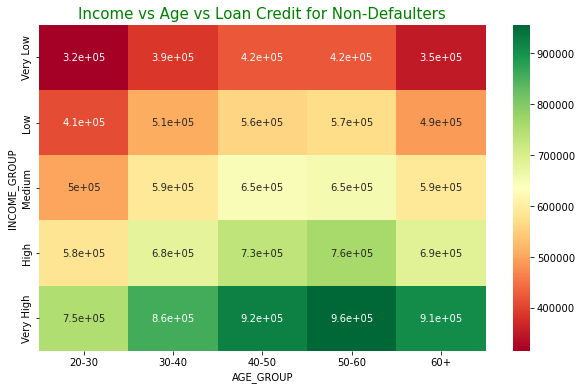

In [137]:
# heatmap for TARGET=0 (Non-Defaulters)
plt.figure(figsize=(10,6))
pvt_tbl = df_0.pivot_table(index='INCOME_GROUP', columns='AGE_GROUP', values='AMT_CREDIT', aggfunc='mean')
sns.heatmap(pvt_tbl, annot=True, cmap='RdYlGn')
plt.title('Income vs Age vs Loan Credit for Non-Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

> **Insights:**
- Income group Very High in the age group 50-60 have a high amount of Credit for both Defaulters and Non-Defaulters, they can bring high profit to the company.
- For very low and low income group, mean of Credit amount is higher for Defaulters

### <font color=blue> Top correlations for numeric variables

In [87]:
# store all columns having numeric data types 
numeric_cols = app_df.select_dtypes(include=['int','float']).columns

# removing 'SK_ID_CURR','DAYS_BIRTH'
numeric_cols = numeric_cols.drop(['SK_ID_CURR','DAYS_BIRTH'])

numeric_cols

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AGE_IN_YEARS'],
      dtype='object')

**<font color=green> TARGET = 1 (Defaulters)**

In [88]:
# top correlations for TARGET=1 (Defaulters)

# generate correlation for all numeric variables
corr_df_1 = df_1[numeric_cols].corr()
corr_df_1 = corr_df_1.unstack()

# display the top 10
top10_1 = pd.DataFrame(corr_df_1[corr_df_1!=1].sort_values(ascending=False).drop_duplicates().head(10))
top10_1.rename(columns={0:'Correlation value'}, inplace=True)
top10_1

Correlation value
OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE     0.998269         
AMT_CREDIT                 AMT_GOODS_PRICE              0.983103         
REGION_RATING_CLIENT       REGION_RATING_CLIENT_W_CITY  0.956637         
CNT_FAM_MEMBERS            CNT_CHILDREN                 0.885484         
DEF_30_CNT_SOCIAL_CIRCLE   DEF_60_CNT_SOCIAL_CIRCLE     0.868994         
REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  0.847885         
REG_CITY_NOT_WORK_CITY     LIVE_CITY_NOT_WORK_CITY      0.778540         
AMT_ANNUITY                AMT_GOODS_PRICE              0.752699         
                           AMT_CREDIT                   0.752195         
REG_REGION_NOT_WORK_REGION REG_REGION_NOT_LIVE_REGION   0.497937

**<font color=green> TARGET = 0 (Non-Defaulters)**

In [89]:
# top correlations for TARGET=0 (Non-Defaulters)

# generate correlation for all numeric variables
corr_df_0 = df_0[numeric_cols].corr()
corr_df_0 = corr_df_0.unstack()

# display the top 10
top10_0 = pd.DataFrame(corr_df_0[corr_df_0!=1].sort_values(ascending=False).drop_duplicates().head(10))
top10_0.rename(columns={0:'Correlation value'}, inplace=True)
top10_0

,,Correlation value
OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
AMT_GOODS_PRICE,AMT_CREDIT,0.987250
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950149
CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.830381
AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
AMT_CREDIT,AMT_ANNUITY,0.771309
REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.446101


> **Insights:**
- We can see that top 10 correlations for Defaulters and Non-defaulters are between same variables.
- We will plot a scatterplot and heatmap for few of them

<font color=brown>**Numerical vs Numerical Variables Correlation**

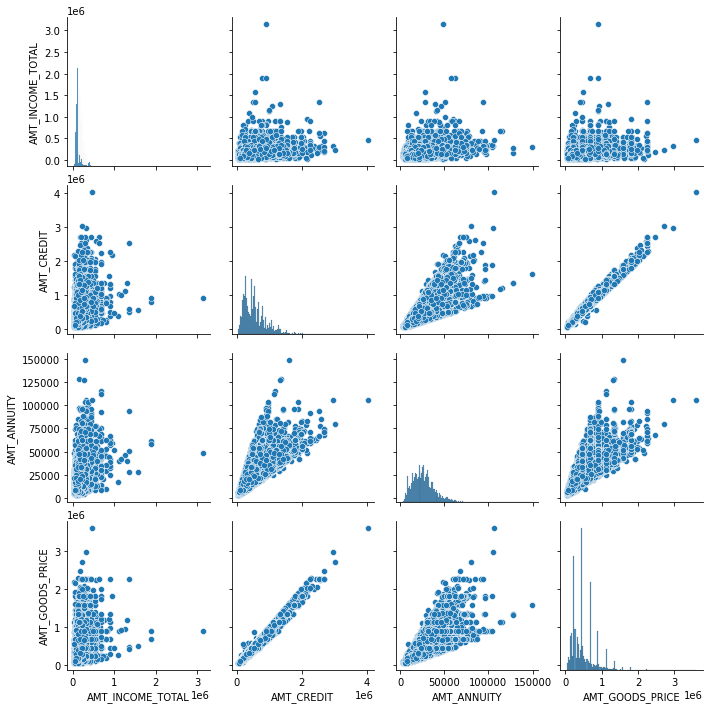

In [90]:
# pairplots for TARGET=1 (Defaulters)
sns.pairplot(df_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])

plt.show()

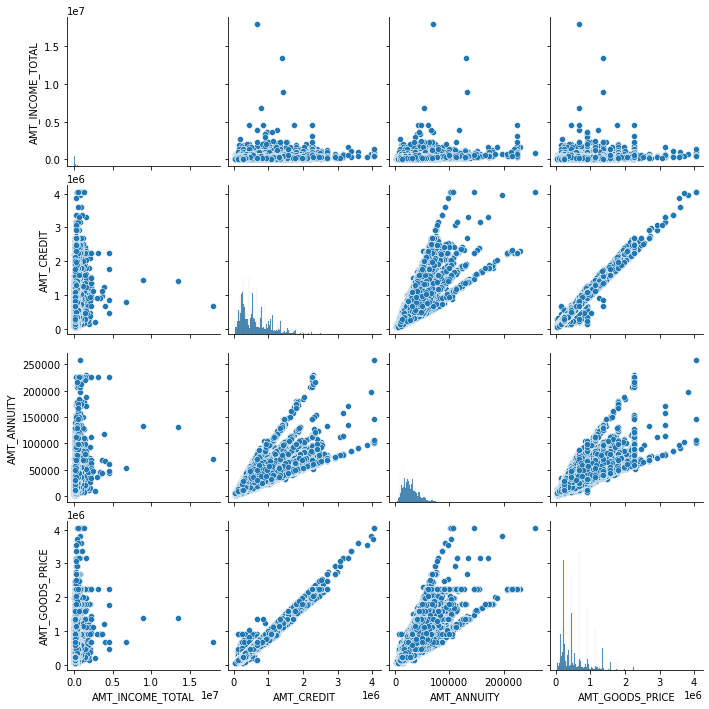

In [91]:
# pairplots for TARGET=0 (Non-Defaulters)
sns.pairplot(df_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])

plt.show()

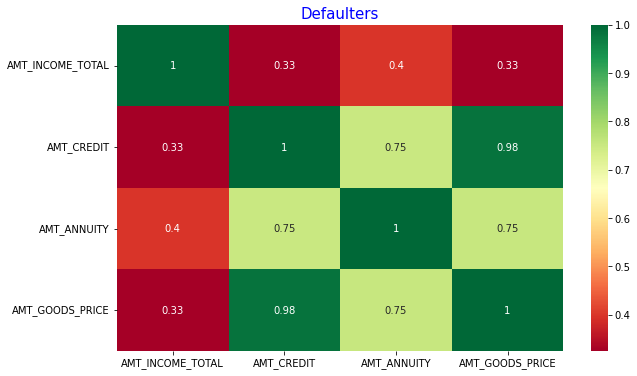

In [92]:
# heatmap for TARGET=1 (Defaulters) showing correlations
plt.figure(figsize=(10,6))
sns.heatmap(df_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(), annot=True, cmap='RdYlGn')
plt.title('Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})
plt.show()

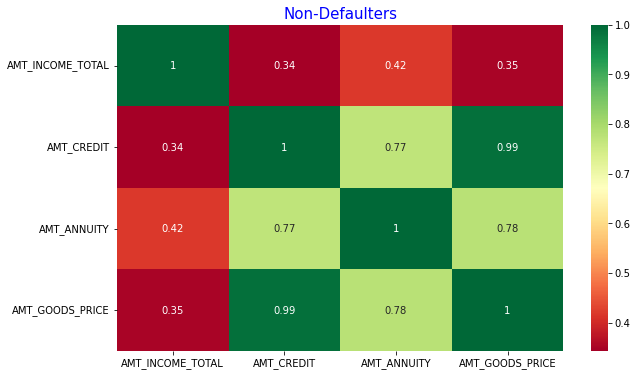

In [93]:
# heatmap for TARGET=0 (Non-Defaulters) showing correlations
plt.figure(figsize=(10,6))
sns.heatmap(df_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(), annot=True, cmap='RdYlGn')
plt.title('Non-Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'b'})
plt.show()

> **Insights**
- There is a medium correlation between Income and Credit, Annuity, Goods Price.
- There is a strong correlation between Annuity and Credit; Annuity and Goods Price
- There is a very strong correlation between Credit and Goods Price

## Analysis for the `previous_application`

## <font color=red> Data Cleaning

### <font color=blue> Dealing with Null values

- <font color=brown> **Calculate null value percentage**

In [94]:
# calculate null value percentages
prev_df.isna().sum()/len(prev_df)*100

SK_ID_PREV                     0.000000 
SK_ID_CURR                     0.000000 
NAME_CONTRACT_TYPE             0.000000 
AMT_ANNUITY                    22.286665
AMT_APPLICATION                0.000000 
AMT_CREDIT                     0.000060 
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START     0.000000 
HOUR_APPR_PROCESS_START        0.000000 
FLAG_LAST_APPL_PER_CONTRACT    0.000000 
NFLAG_LAST_APPL_IN_DAY         0.000000 
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         0.000000 
NAME_CONTRACT_STATUS           0.000000 
DAYS_DECISION                  0.000000 
NAME_PAYMENT_TYPE              0.000000 
CODE_REJECT_REASON             0.000000 
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE               0.000000 
NAME_GOODS_CATEGORY            0.000000 
NAME_PORTFOLIO                 0.000000 
NAME_PRODUCT_TYP

> **Insights:**
- Since, not all applications have been Approved, some columns will have Null values
- Let's check the NULL values for 'Approved' data

In [95]:
# null values for 'Approved'
prev_df[prev_df['NAME_CONTRACT_STATUS']=='Approved'].isnull().sum()/len(prev_df[prev_df['NAME_CONTRACT_STATUS']=='Approved'])*100

SK_ID_PREV                     0.000000 
SK_ID_CURR                     0.000000 
NAME_CONTRACT_TYPE             0.000000 
AMT_ANNUITY                    0.000772 
AMT_APPLICATION                0.000000 
AMT_CREDIT                     0.000096 
AMT_DOWN_PAYMENT               36.111773
AMT_GOODS_PRICE                4.131538 
WEEKDAY_APPR_PROCESS_START     0.000000 
HOUR_APPR_PROCESS_START        0.000000 
FLAG_LAST_APPL_PER_CONTRACT    0.000000 
NFLAG_LAST_APPL_IN_DAY         0.000000 
RATE_DOWN_PAYMENT              36.111773
RATE_INTEREST_PRIMARY          99.426012
RATE_INTEREST_PRIVILEGED       99.426012
NAME_CASH_LOAN_PURPOSE         0.000000 
NAME_CONTRACT_STATUS           0.000000 
DAYS_DECISION                  0.000000 
NAME_PAYMENT_TYPE              0.000000 
CODE_REJECT_REASON             0.000000 
NAME_TYPE_SUITE                35.923112
NAME_CLIENT_TYPE               0.000000 
NAME_GOODS_CATEGORY            0.000000 
NAME_PORTFOLIO                 0.000000 
NAME_PRODUCT_TYP

> - Columns having Null value percentage > 40% can be removed 

<font color=brown> **Drop colmuns having null values > 40%**

In [96]:
# dropping the columns having null values > 40%
prev_df.drop(columns = prev_df.loc[0:5,prev_df.isnull().mean()*100 > 40].columns, inplace=True)

<font color=brown> **Checking for categorical columns**

In [97]:
# checking the value_counts of all categorical variables
# to decide which columns can de dropped
cols = prev_df.columns

for i,v in enumerate(cols):
    if prev_df[v].dtypes=='object':
        print(prev_df[v].value_counts(normalize=True, dropna=False)*100)
        print()


Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                0.020716 
Name: NAME_CONTRACT_TYPE, dtype: float64

TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY       9.864065 
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

Y    99.49258
N    0.50742 
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

XAP                                 55.242083
XNA                                 40.588691
Repairs                             1.422872 
Other                               0.934491 
Urgent needs                        0.503648 
Buying a used car                   0.172912 
Building a house or an annex        0.161237 
Everyday expenses                   0.144652 
Medicine                            0.130163 
Payments on other loans             0.115614 
Education                           0.094180 
Journey                             0.074182 


> **Insights:**
- Some columns can be dropped
- Columns having XNA and XAP can be replace with 'Unknown'

<font color=green> **Following columns can be dropped:**
    
- *NAME_CASH_LOAN_PURPOSE*: High XAP and XNA values (95%)
- *WEEKDAY_APPR_PROCESS_START*: Not relevant
- *WEEKDAY_APPR_PROCESS_START*: 99% values are same
- *NAME_GOODS_CATEGORY*: High XNA values (56%)
- *SELLERPLACE_AREA*: not relevant
- *FLAG_LAST_APPL_PER_CONTRACT* : more than 99% value of same type (Y)

In [98]:
#dropping columns
prev_df.drop(columns=['NAME_CASH_LOAN_PURPOSE','WEEKDAY_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START',
                      'NAME_GOODS_CATEGORY','SELLERPLACE_AREA','FLAG_LAST_APPL_PER_CONTRACT'],inplace=True)

In [99]:
#check the shape
prev_df.shape

(1670214, 21)

<font color=brown> **Replacing all XNA and XAP values with 'Unknown' for categorical columns**

In [100]:
#replacing all XAN and XAP values with 'Unknown' for categorical columns

cols = prev_df.select_dtypes(include=['object']).columns

for i,v in enumerate(cols):
    prev_df[v].replace('XNA','Unknown', inplace=True)
    prev_df[v].replace('XAP','Unknown', inplace=True)

<font color=brown> **Replacing all XNA and XAP values with NaN for numerical columns**

In [104]:
#replacing all XAN and XAP values with NaN
prev_df.replace('XNA',np.NaN, inplace=True)
prev_df.replace('XAP',np.NaN, inplace=True)

***

### <font color=blue> Dealing with Outliers

<font color=brown>**Columns we will analyze now for outliers:**
1. AMT_CREDIT
2. AMT_ANNUITY

<font color=green> **AMT_CREDIT**

In [108]:
#checking the statistical description
prev_df['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

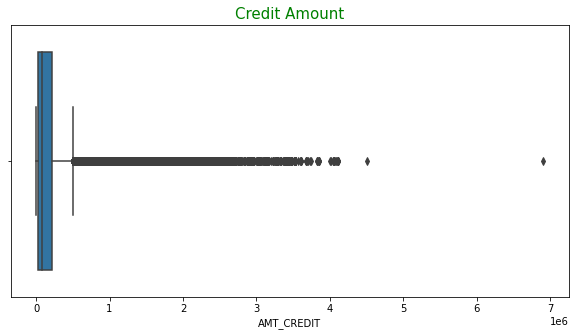

In [109]:
#plot the boxplot to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(prev_df['AMT_CREDIT'])
plt.title('Credit Amount', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

> **Insights:**
- As seen, there is one high value of outlier
- While dealing with this variable, use median instead of mean

<font color=green> **AMT_ANNUITY**

In [110]:
#checking the statistical description
prev_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

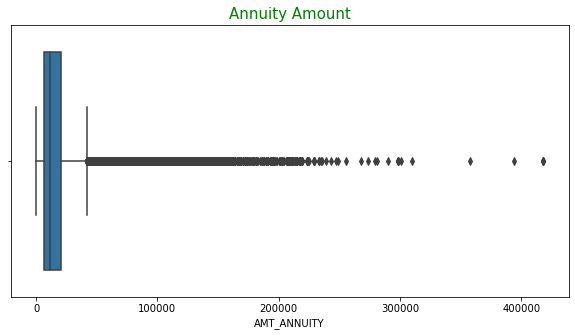

In [111]:
#plot the boxplot to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(prev_df['AMT_ANNUITY'])
plt.title('Annuity Amount', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

> **Insights:**
- As seen, there are few high values of outlier
- While dealing with this variable, use median instead of mean

***

### <font color=brown> **Merging the DataFrames**

- Create a new DataFrame by merging the application_data and previous_application

- After merging we will do Analysis on it

In [112]:
# merging the two data sets
merge_df = pd.merge(app_df, prev_df, on='SK_ID_CURR', how='left', suffixes=('_current','_prev'))

In [113]:
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_ANNUITY_current,AMT_GOODS_PRICE_current,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_CREDIT_prev,AMT_GOODS_PRICE_prev,HOUR_APPR_PROCESS_START_prev,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637.0,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,True,0.0,0.0,1.0,25.920548,20-30,High,Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,9.0,1.0,Approved,-606.0,Unknown,Unknown,New,POS,Unknown,Stone,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188.0,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,True,0.0,0.0,0.0,45.931507,40-50,Very High,Very High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,12.0,1.0,Approved,-746.0,Unknown,Unknown,Repeater,Cash,x-sell,Credit and cash offices,Unknown,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188.0,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,True,0.0,0.0,0.0,45.931507,40-50,Very High,Very High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,17.0,1.0,Approved,-828.0,Cash through the bank,Unknown,Refreshed,POS,Unknown,Stone,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188.0,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,True,0.0,0.0,0.0,45.931507,40-50,Very High,Very High,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,15.0,1.0,Approved,-2341.0,Cash through the bank,Unknown,Refreshed,POS,Unknown,Country-wide,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225.0,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,False,0.0,0.0,0.0,52.180822,50-60,Very Low,Very Low,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,5.0,1.0,Approved,-815.0,Cash through the bank,Unknown,New,POS,Unknown,Regional / Local,Connectivity,4.0,middle,POS mobile without interest


In [114]:
merge_df.shape

(1430155, 75)

- We now divivde our data set into two parts:

<font color=brown> **Data set of Defaulters**

In [115]:
# Data set of defaulters (TARGET=1)
merge_df_1 = merge_df[merge_df['TARGET']==1].copy()

<font color=brown> **Data set of Non-Defaulters**

In [116]:
# Data set of non-defaulters (TARGET=0)
merge_df_0 = merge_df[merge_df['TARGET']==0].copy()

***

## **<font color=red> Univariate Analysis**
    
***

<font color=green> **Categorical Columns**

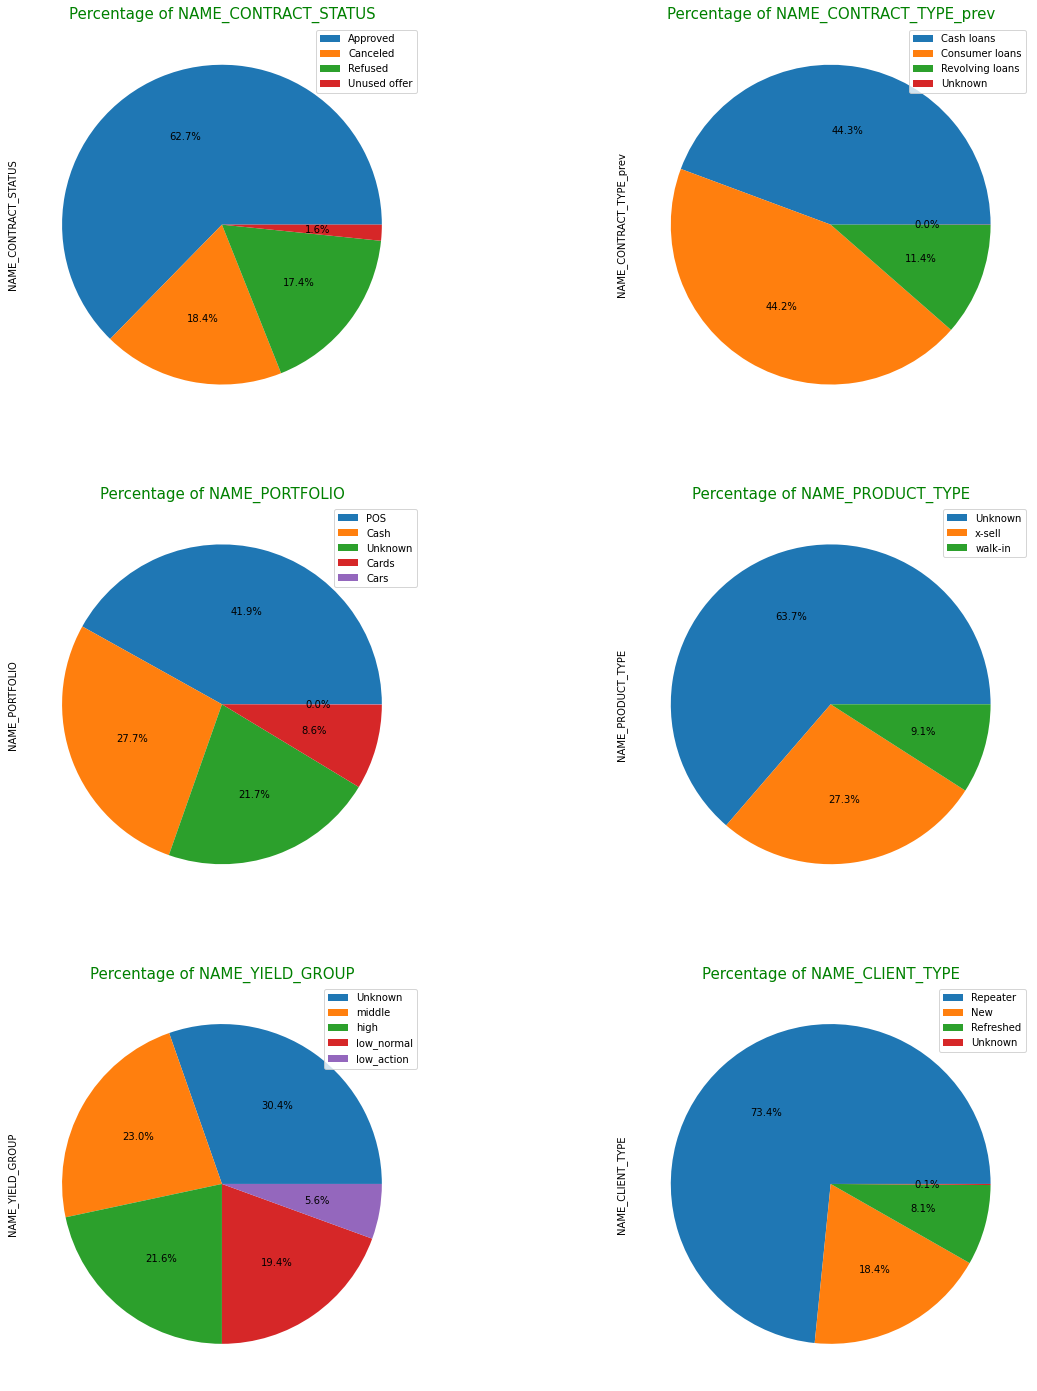

In [117]:
cols = ['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE_prev',
        'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']

plt.figure(figsize=(20,25))
for i,v in enumerate(cols):
    plt.subplot(len(cols)//2,2,i+1)
    merge_df[v].value_counts().plot.pie(autopct='%1.1f%%', labeldistance=None)
    plt.legend(loc='upper right')
    plt.title(f'Percentage of {v}', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

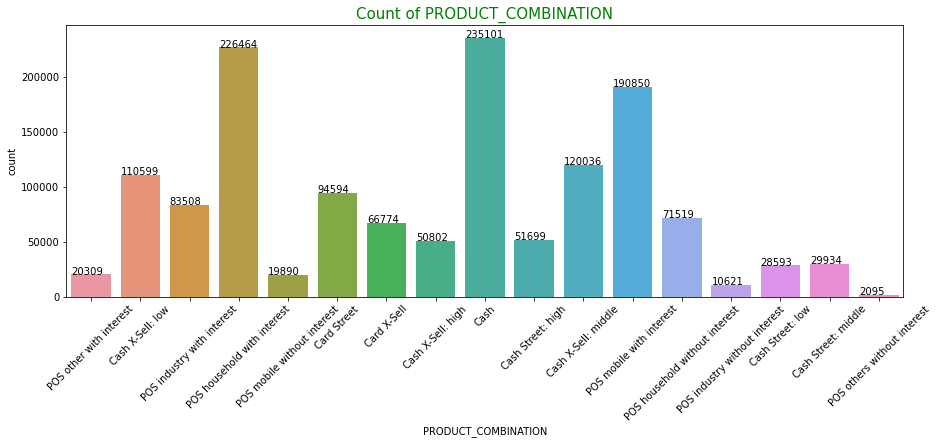

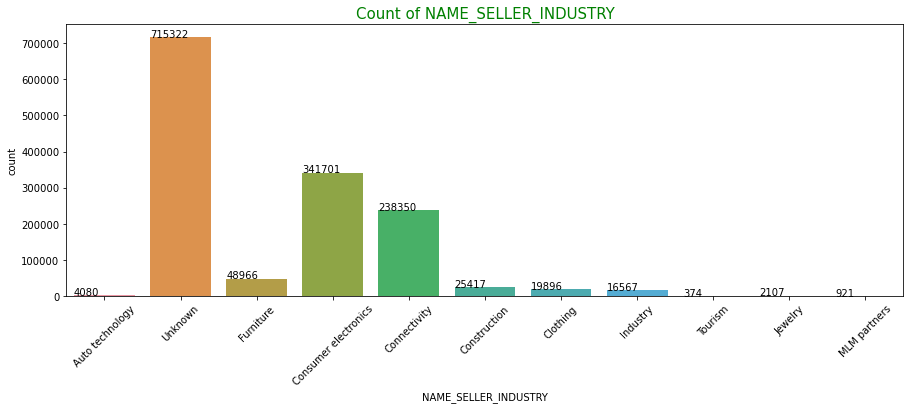

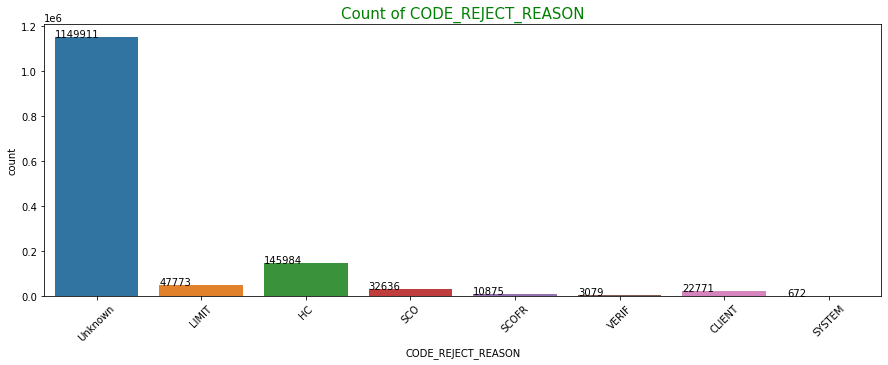

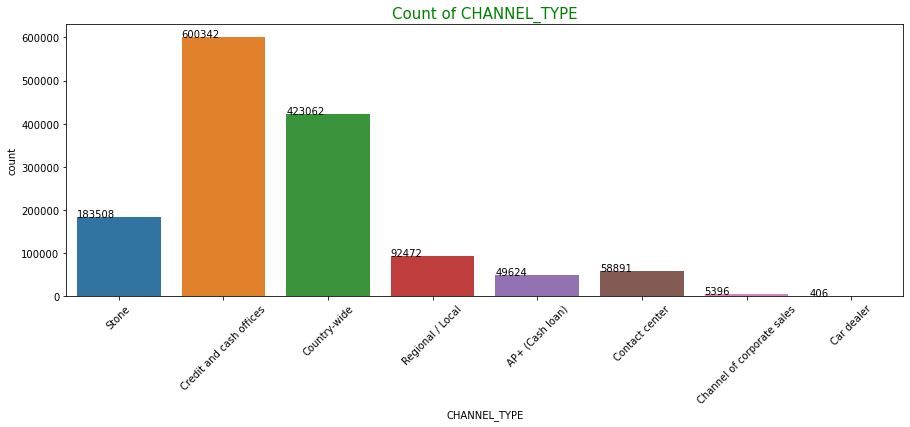

In [118]:
# variables to be analysed
# 'PRODUCT_COMBINATION', 'NAME_SELLER_INDUSTRY','CODE_REJECT_REASON','CHANNEL_TYPE'

cols = ['PRODUCT_COMBINATION', 'NAME_SELLER_INDUSTRY','CODE_REJECT_REASON','CHANNEL_TYPE']

for i,v in enumerate(cols):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=merge_df, x=v)
    plt.xticks(rotation=45)
    # show frequency of bars
    for p in ax.patches:
        ax.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))
    plt.title(f'Count of {v}', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
   

> **Insights:**
- As seen, most of the loans (63%) which were applied got approved
- Most loan types are Consumer Loans and Cash Loans
- HC is the most given reason for rejection of loans
- Highest number of consumers are of Middle group
- 73% of people are repeaters
- Most people are from Consumer Electronics
- Most clients were acquired by Cash and Credit offices


    
***

## **<font color=red> Bivariate and Multivariate Analysis**
    
***

<font color=green> **Contract Status vs Target**

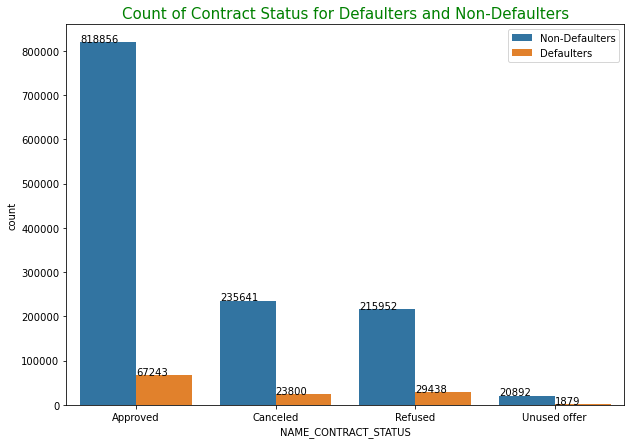

In [119]:
# countplot of different contract statuses for DEFAULTERS and NON-DEFAULTERS

plt.figure(figsize=(10,7))
ax = sns.countplot(data=merge_df, x='NAME_CONTRACT_STATUS', hue='TARGET')
plt.legend(labels=['Non-Defaulters','Defaulters'])
for p in ax.patches:
    ax.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))
plt.title('Count of Contract Status for Defaulters and Non-Defaulters',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

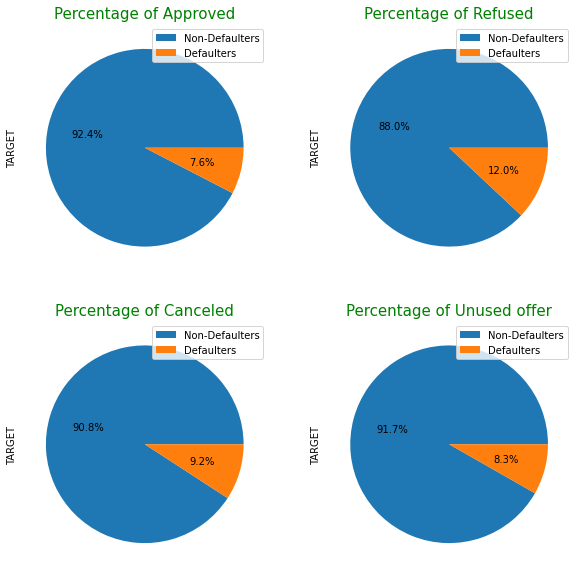

In [120]:
# pie chart for each category of Contract Status showing percentage of DEFAULTERS and NON-DEFAULTERS

cols= ['Approved','Refused','Canceled','Unused offer']

plt.figure(figsize=(10,10))
for i,v in enumerate(cols):
    plt.subplot(2,2,i+1)
    merge_df['TARGET'][merge_df['NAME_CONTRACT_STATUS']==v].value_counts().plot.pie(autopct='%1.1f%%', labeldistance=None)
    plt.title(f'Percentage of {v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.legend(labels=['Non-Defaulters','Defaulters'],loc='upper right')
    
plt.show()

> **Insights:**
- Around 7.6 % people whose contract was approved previously are in Defaulters category. This percentage has to be brought down even further to enhance profit.
- Around 88.0% people whose contract was refused previously are in Non-Defaulters category. This percentage is very high which can lead to loss to the company.
- Around 90% people whose contract got Canceled previously are in Non-Defaulters category. This percentage is very high which can lead to loss to the company.

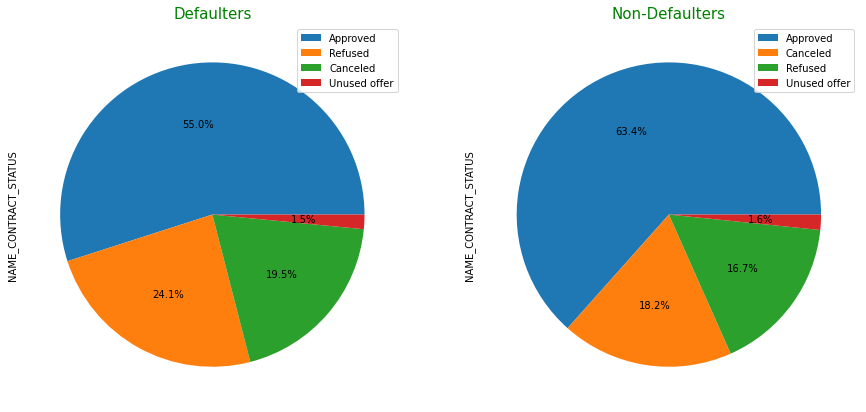

In [121]:
# plt a pie chart to see the percentages of different categories of Contract Status for DEFAULTERS and NON-DEFAULTERS

plt.figure(figsize=(15,7))    
# for TARGET=1 (Defaulters)
plt.subplot(1,2,1)
merge_df_1['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.1f%%', labeldistance=None)
plt.legend(loc='upper right')
plt.title('Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

# for TARGET=0 (Non-Defaulters)
plt.subplot(1,2,2)
merge_df_0['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.1f%%', labeldistance=None)
plt.legend(loc='upper right')
plt.title('Non-Defaulters', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

> **Insights:**
- For Defaulters, about 55% of previous loan application was approved, this number is quite high.
- For Non-defaulters, about 17% and 18% were Refused and Canceled. This number is quite high.

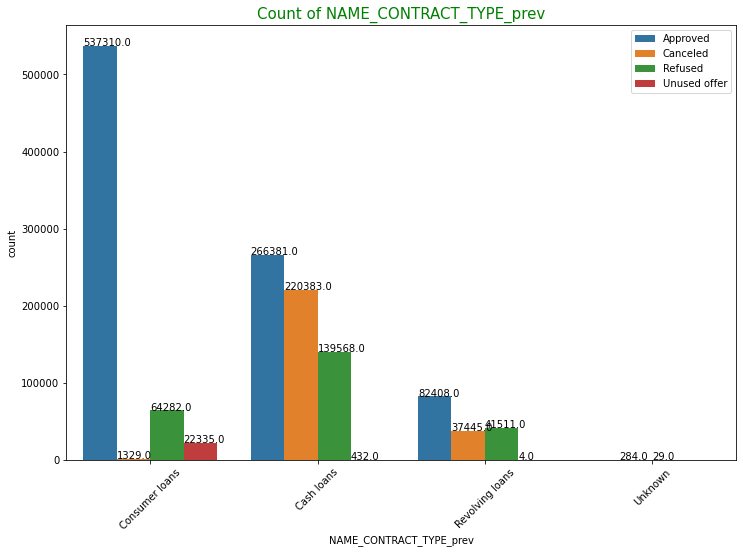

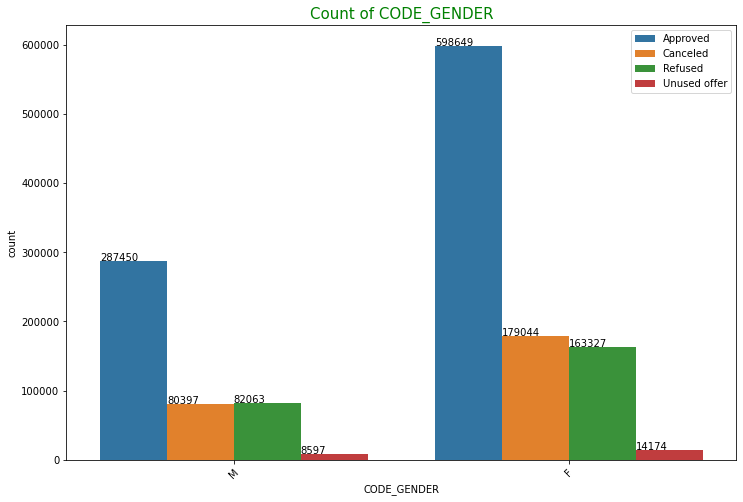

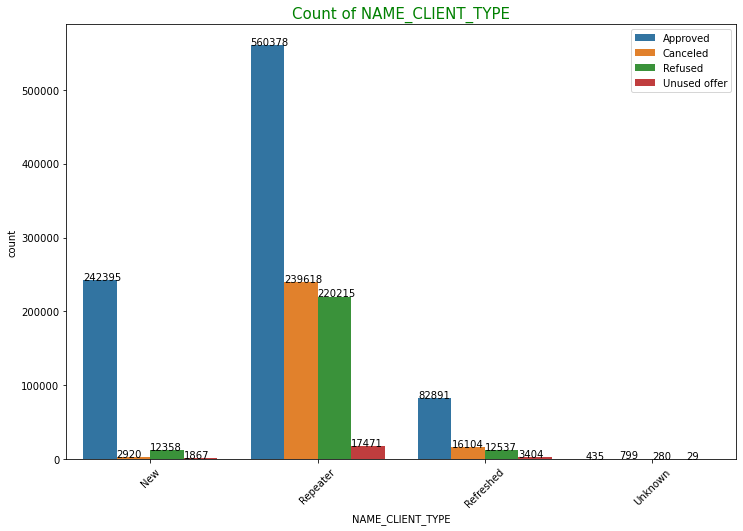

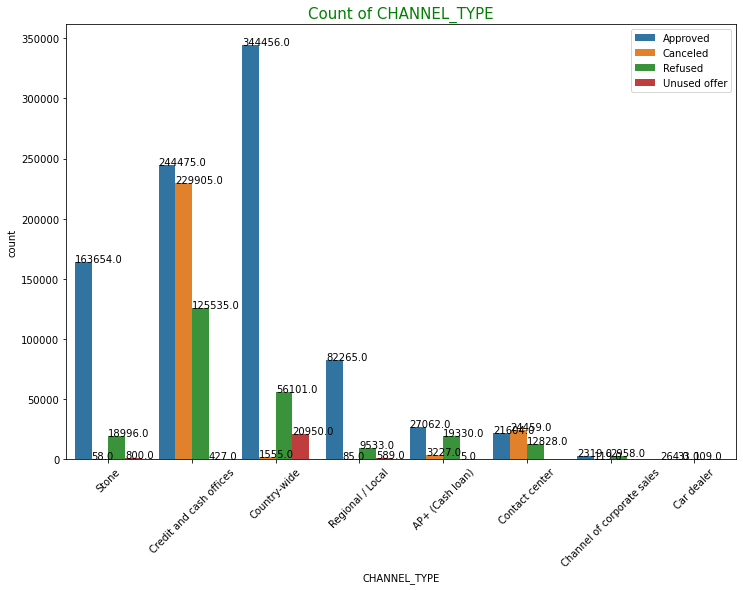

In [122]:
# variables to be analysed
# 'NAME_CONTRACT_TYPE_prev','CODE_GENDER','NAME_CLIENT_TYPE','CHANNEL_TYPE'

cols= ['NAME_CONTRACT_TYPE_prev','CODE_GENDER','NAME_CLIENT_TYPE','CHANNEL_TYPE']

for i,v in enumerate(cols):
    plt.figure(figsize=(12,8))
    ax = sns.countplot(data=merge_df, x=v, hue='NAME_CONTRACT_STATUS')
    plt.xticks(rotation=45)
    # show frequency of bars
    for p in ax.patches:
        ax.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))
    plt.title(f'Count of {v}', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.legend(loc='upper right')
plt.show()

> **Insights:**
- People with consumer loans had highest approval rate and people with cash loans had a high cancelation and refusal rate
- Females had a higher rate of approval than Males
- New Clients had highest approval rate, whereas Repeaters had a high cancelation and refusal rate
- People who came from Stone or Countr-Wide had highest approval rate where as people coming from Credit and Cash offices had high cancelation and refusal rate

***

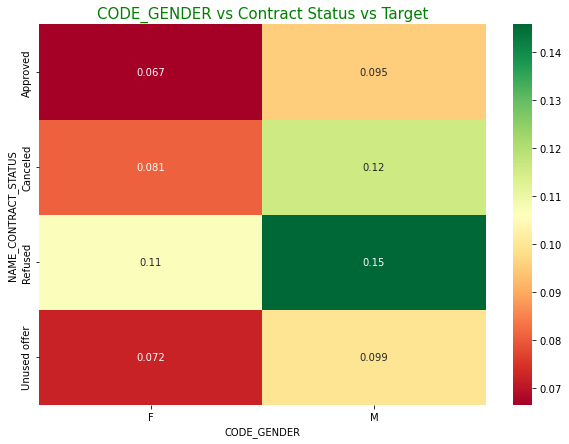

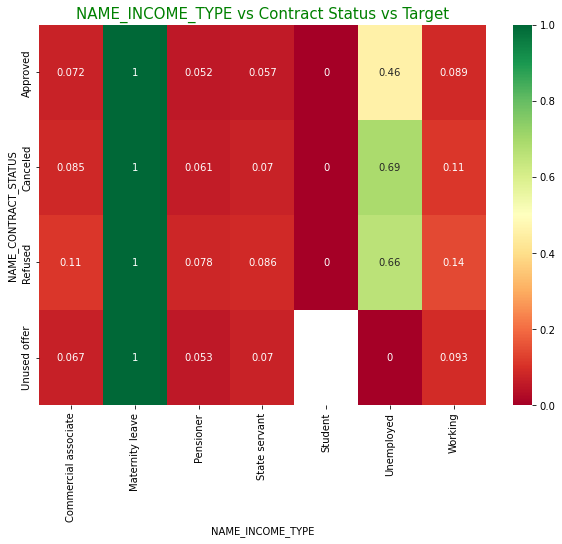

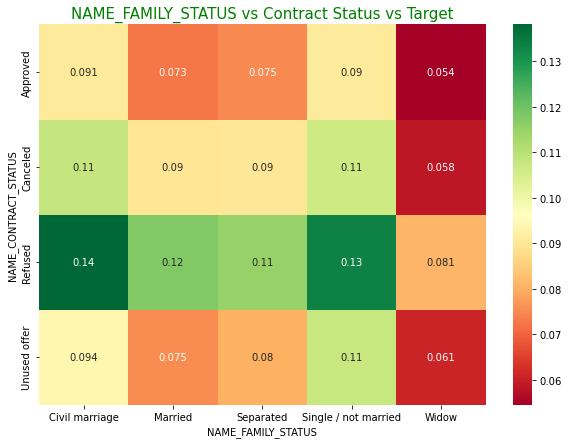

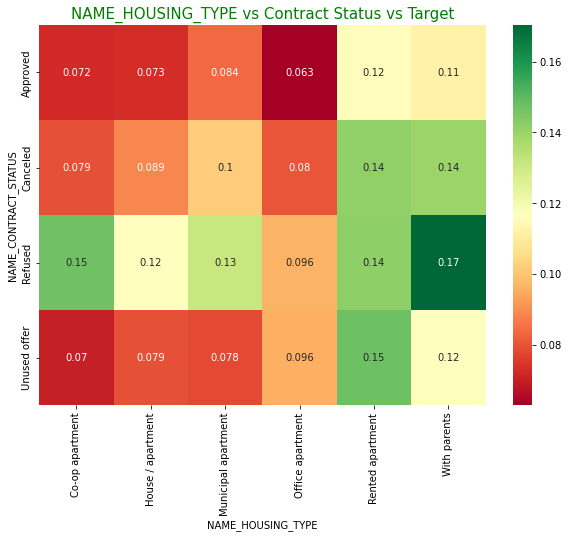

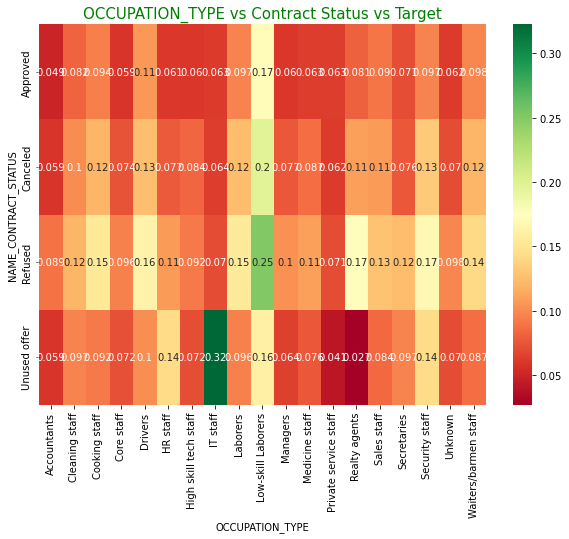

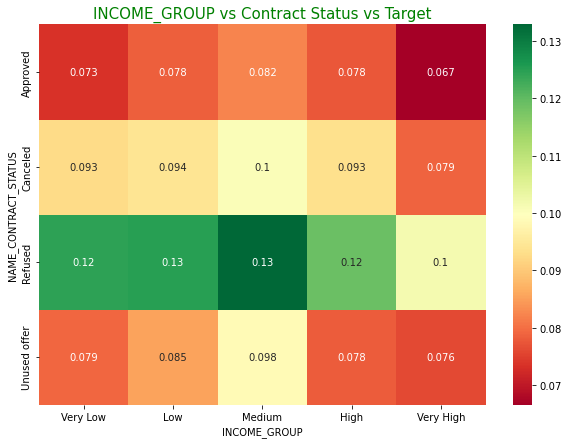

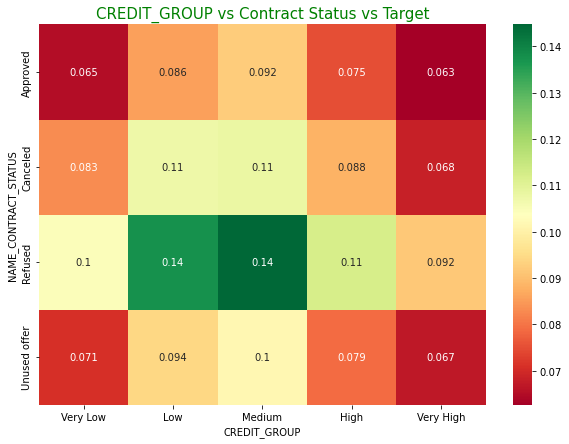

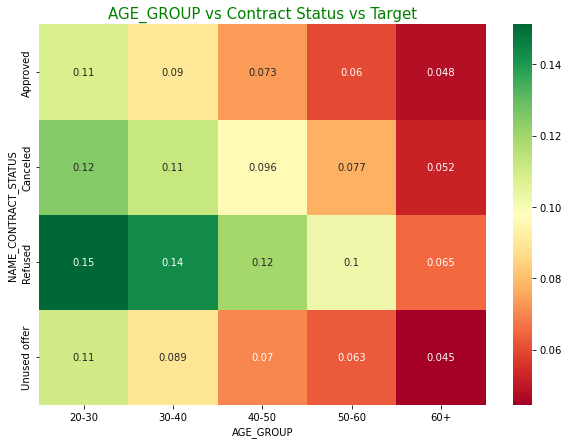

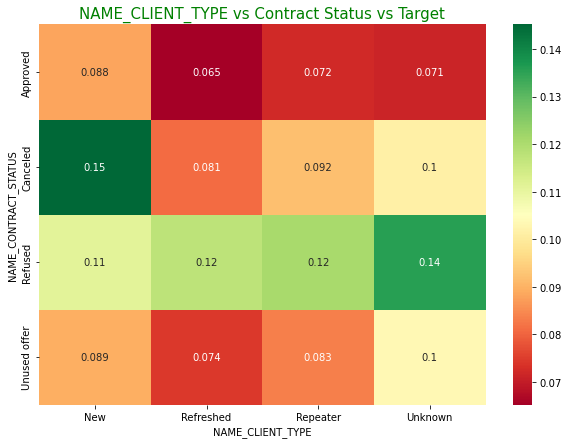

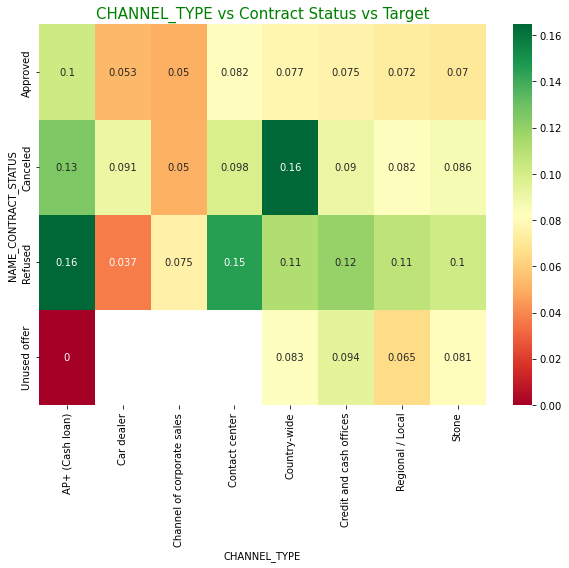

In [134]:
# variables to be analysed
# 'CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
# 'INCOME_GROUP', 'CREDIT_GROUP','AGE_GROUP','NAME_CLIENT_TYPE','CHANNEL_TYPE'

cols = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
       'INCOME_GROUP', 'CREDIT_GROUP','AGE_GROUP','NAME_CLIENT_TYPE','CHANNEL_TYPE']

# plot a heatmap of Gender vs some categorical variable with TARGET as mean
# Higher value means more likely to default
for i,v in enumerate(cols):
    plt.figure(figsize=(10,7))
    sns.heatmap(merge_df.pivot_table(index='NAME_CONTRACT_STATUS',columns=v, values='TARGET', aggfunc='mean'), annot=True, cmap="RdYlGn")
    plt.title(f'{v} vs Contract Status vs Target', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'} )

plt.show()

> **Insights:** *Following people have a higher chance of Defaulting*
- Males who were previously refused
- Unemployed people who were previously refused or canceled
- Females on maternity leave
- People in Civil/marriage or Single people who were previously refused
- People living with Parents who were previously refused
- People living in Apartments who were previously
- IT-Staff who had previously unused offer and Low-skilled labourers who were previously refused or canceled
- 20-30 or 30-40 age group who were previously refused
- New clients who got canceled previously

### <font color=blue> Top correlations for numeric variables

In [124]:
# store all columns having numeric data types 
num_cols = prev_df.select_dtypes(include=['int','float']).columns

# removing 'SK_ID_CURR','SK_ID_PREV
num_cols = num_cols.drop(['SK_ID_CURR','SK_ID_PREV'])

num_cols

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'CNT_PAYMENT'],
      dtype='object')

In [125]:
# top correlations for numeric variables

# generate correlation for all numeric variables
corr_df = prev_df[num_cols].corr()
corr_df = corr_df.unstack()

# display the top 10
top10 = pd.DataFrame(corr_df[corr_df!=1].sort_values(ascending=False).drop_duplicates().head(10))
top10.rename(columns={0:'Correlation value'}, inplace=True)
top10

Correlation value
AMT_GOODS_PRICE AMT_APPLICATION  0.999884         
AMT_CREDIT      AMT_GOODS_PRICE  0.993087         
AMT_APPLICATION AMT_CREDIT       0.975824         
AMT_ANNUITY     AMT_GOODS_PRICE  0.820895         
                AMT_CREDIT       0.816429         
                AMT_APPLICATION  0.808872         
CNT_PAYMENT     AMT_APPLICATION  0.680630         
                AMT_CREDIT       0.674278         
AMT_GOODS_PRICE CNT_PAYMENT      0.672129         
CNT_PAYMENT     AMT_ANNUITY      0.394535

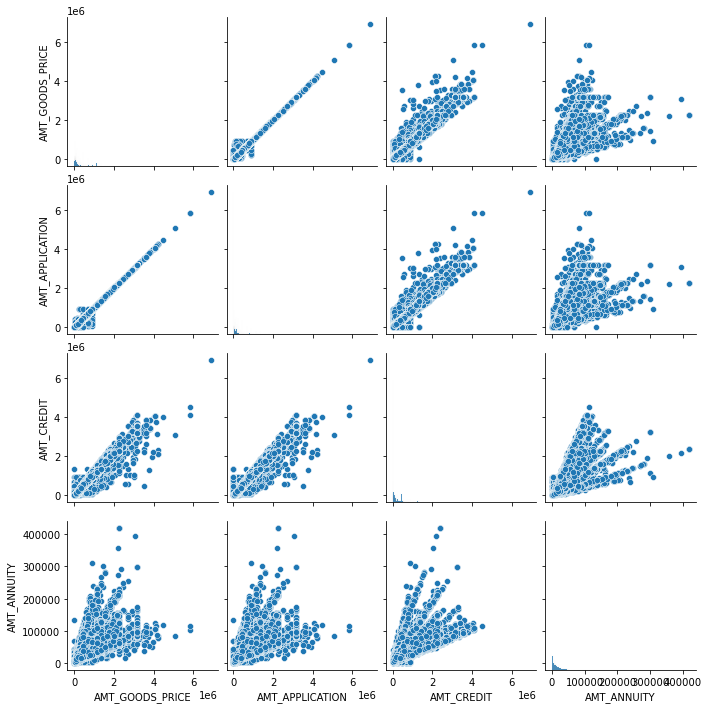

In [133]:
# Pairplot for variables with high correlation
sns.pairplot(prev_df[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY']])

plt.show()

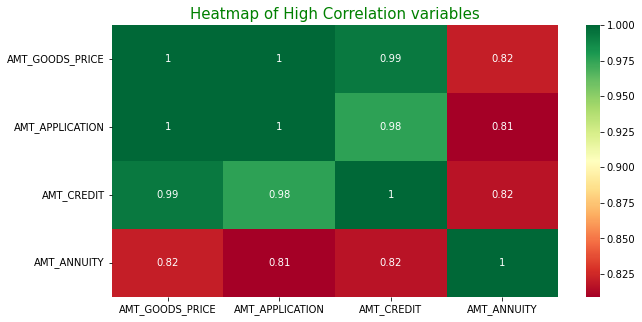

In [135]:
# heatmap for variables with high correlation
plt.figure(figsize=(10,5))
sns.heatmap(prev_df[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY']].corr()
            , cmap='RdYlGn', annot=True)
plt.title('Heatmap of High Correlation variables', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'} )
plt.show()

> **Insights**
- There is a high correlation between 'AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT'
- There is a medium correaltion between 'CNT_PAYMENT' and other variables

***

## <font color=red> Conclusion

**`application_data`**
- Income group Very High in the age group 50-60 have a high amount of Credit for both Defaulters and Non-Defaulters, they can bring high profit to the company.
- The following have resulted in defaulting more than others:
    - Males
    - Unemployed
    - Females on maternity leave
    - 20-30 and 30-40 age group
    - Laborers ,low-skilled laborers 
    - People with less working experience
- The following should also be kept an eye on
    - People who changed their phone numbers recently 
    - Lower values of EXT_SOURCE_2 and EXT_SOURCE_3

**`previous_application`**
- Around 7.6 % people whose contract was approved previously are in Defaulters category. This percentage has to be brought down even further to enhance profit.
- Around 88.0% people whose contract was refused previously are in Non-Defaulters category. This percentage is very high which can lead to loss to the company.
- Around 90% people whose contract got Canceled previously are in Non-Defaulters category. This percentage is very high which can lead to loss to the company.
- The following people are credible but were refused loan previously:
    - Females
    - Widows
    - Pensioners
    - 60+ age group
    - Car dealers
